# Movies Dataset Cleaning and EDA

## 1. Cleaning and Manipulating the Data

### Data Import and first Inspection

In [117]:
import pandas as pd
import numpy as np
import os
import json
import ast

pd.options.display.max_columns= 30

In [118]:
# determining current location and finding name of my dataset in the data folder
print(os.getcwd())
print(os.listdir('../Data/'))

D:\Python\Projects\Notebooks
['credits.csv', 'movies_clean.csv', 'movies_metadata.csv']


In [119]:
# importing the dataset
df = pd.read_csv('../Data/movies_metadata.csv', low_memory=False)

In [120]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [121]:
# first inspections about the dataset
print('rows: ', df.shape[0], '\ncolumns: ', df.shape[1], '\n----')
print(df.info())

rows:  45466 
columns:  24 
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date         

In [122]:
# null values by columns
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Inspecting columns

#### Dropping irrelevant columns

In [123]:
df['adult'].value_counts()  # useless

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [124]:
df.drop(columns='adult', axis=1, inplace=True)

In [125]:
df['homepage']  # useless

0        http://toystory.disney.com/toy-story
1                                         NaN
2                                         NaN
3                                         NaN
4                                         NaN
                         ...                 
45461    http://www.imdb.com/title/tt6209470/
45462                                     NaN
45463                                     NaN
45464                                     NaN
45465                                     NaN
Name: homepage, Length: 45466, dtype: object

In [126]:
df.drop(columns='homepage', axis=1, inplace=True)

In [127]:
df[['id','imdb_id']]   # imdb_id is useless

,id,imdb_id
0,862,tt0114709
1,8844,tt0113497
2,15602,tt0113228
3,31357,tt0114885
4,11862,tt0113041
...,...,...
45461,439050,tt6209470
45462,111109,tt2028550
45463,67758,tt0303758
45464,227506,tt0008536


In [128]:
df[['title', 'original_title']]   # original_title is useless

,title,original_title
0,Toy Story,Toy Story
1,Jumanji,Jumanji
2,Grumpier Old Men,Grumpier Old Men
3,Waiting to Exhale,Waiting to Exhale
4,Father of the Bride Part II,Father of the Bride Part II
...,...,...
45461,Subdue,رگ خواب
45462,Century of Birthing,Siglo ng Pagluluwal
45463,Betrayal,Betrayal
45464,Satan Triumphant,Satana likuyushchiy


In [129]:
df.drop(columns=['original_title', 'imdb_id'], axis=1, inplace=True)

In [130]:
df['video'].value_counts() # useless

False    45367
True        93
Name: video, dtype: int64

In [131]:
df.drop(columns='video', axis=1, inplace=True)

In [132]:
df[['original_language', 'spoken_languages']]  # useful

,original_language,spoken_languages
0,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...
45461,fa,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
45462,tl,"[{'iso_639_1': 'tl', 'name': ''}]"
45463,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
45464,en,[]


In [133]:
df['status'].value_counts() # we need only released movies

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [134]:
# create new df containing only released movies
df = df[df['status']=='Released'].copy()

In [135]:
df.drop(columns='status', axis=1, inplace=True)

#### Flattening nested columns

In [136]:
df.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


In [137]:
nested_cols = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

In [138]:
df['belongs_to_collection'][0]  # it is a string not a dict.

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [139]:
# converting string values to dictionaries
for col in nested_cols:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [140]:
# checking types of columns' values
for col in nested_cols:
    print(col, '-->', type(df[col][0]))

belongs_to_collection --> <class 'dict'>
genres --> <class 'list'>
production_companies --> <class 'list'>
production_countries --> <class 'list'>
spoken_languages --> <class 'list'>


In [141]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [142]:
df['genres'].apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
45461                Drama|Family
45462                       Drama
45463       Action|Drama|Thriller
45464                            
45465                            
Name: genres, Length: 45014, dtype: object

In [143]:
# flattening nested columns
for col in nested_cols:
    if isinstance(df[col][0], list):
        df[col] = df[col].apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)
    else: 
        continue

In [144]:
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,Toy Story Collection,30000000,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,NaN,Toy Story,7.7,5415.0
1,NaN,65000000,Adventure|Fantasy|Family,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,1995-12-15,262797249.0,104.0,English|Français,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,Grumpy Old Men Collection,0,Romance|Comedy,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Warner Bros.|Lancaster Gate,United States of America,1995-12-22,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0


In [145]:
df['production_companies'].value_counts()

                                                                                                   11635
Metro-Goldwyn-Mayer (MGM)                                                                            741
Warner Bros.                                                                                         540
Paramount Pictures                                                                                   502
Twentieth Century Fox Film Corporation                                                               438
                                                                                                   ...  
Generation Blue Films                                                                                  1
Ingenious Film Partners|1492 Pictures|Fox Atomic|Dune Entertainment III|Bece Canada Productions        1
ERA International|3-H Films                                                                            1
Summit Entertainment|Goldsmith-Thomas Productions|Walde

In [146]:
df['production_countries'].value_counts()

United States of America                                17733
                                                         6149
United Kingdom                                           2228
France                                                   1638
Japan                                                    1350
                                                        ...  
France|Monaco|Spain|Switzerland                             1
France|United Kingdom|Belgium                               1
Serbia|Italy|Spain                                          1
Spain|United Kingdom|United States of America|France        1
Egypt|Italy|United States of America                        1
Name: production_countries, Length: 2378, dtype: int64

_In some of the above columns empty lists are converted to empty strings, we need to convert them to nan values_

In [147]:
# instead of identifying and replacing values col by col, we can use applymap to apply the function to the entire df
df = df.applymap(lambda x: np.nan if x=='' else x)

#### Cleaning numerical columns

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45014 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4466 non-null   object 
 1   budget                 45014 non-null  object 
 2   genres                 42630 non-null  object 
 3   id                     45014 non-null  object 
 4   original_language      45004 non-null  object 
 5   overview               44094 non-null  object 
 6   popularity             45014 non-null  object 
 7   poster_path            44641 non-null  object 
 8   production_companies   33379 non-null  object 
 9   production_countries   38865 non-null  object 
 10  release_date           44936 non-null  object 
 11  revenue                45014 non-null  float64
 12  runtime                44763 non-null  float64
 13  spoken_languages       41137 non-null  object 
 14  tagline                20300 non-null  object 
 15  ti

In [149]:
# casting type of budget column to the number
df['budget'] = pd.to_numeric(df['budget'])

In [150]:
df['budget'].value_counts(dropna=False) # there is 0 values, which is nonsense

0            36149
5000000        286
10000000       259
20000000       243
2000000        241
             ...  
270000000        1
923              1
72500000         1
2160000          1
1254040          1
Name: budget, Length: 1219, dtype: int64

In [151]:
# replacing 0 values with nan in budget col
df['budget'] = df['budget'].replace(0, np.nan)

In [152]:
# converting values to million usd
df['budget'] = df['budget'].div(1000000)

In [153]:
df['revenue'].value_counts(dropna=False)

0.0           37619
12000000.0       20
10000000.0       19
11000000.0       19
2000000.0        18
              ...  
36565280.0        1
439564.0          1
35610100.0        1
10217873.0        1
1413000.0         1
Name: revenue, Length: 6851, dtype: int64

In [154]:
# the same operations should be done for revenue column
df['revenue'] = df['revenue'].astype('int64')
df['revenue'] = df['revenue'].replace(0, np.nan)
df['revenue'] = df['revenue'].div(1000000)

In [155]:
# assigning more descriptive names for the columns above
df.rename(columns={'revenue':'revenue_musd',
                   'budget':'budget_musd'},
          inplace=True)

In [156]:
df['runtime'].value_counts(dropna=False).head(20) # again 0 values should be replaced with nan

90.0     2531
0.0      1496
100.0    1457
95.0     1400
93.0     1202
96.0     1098
92.0     1067
94.0     1050
91.0     1048
88.0     1024
97.0     1022
85.0     1015
98.0     1010
105.0     997
89.0      944
87.0      913
110.0     842
86.0      838
102.0     784
99.0      783
Name: runtime, dtype: int64

In [157]:
# casting type of runtime col from float to int
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

In [158]:
# replacing 0 with nan
df['runtime'] = df['runtime'].replace(0, np.nan)

In [159]:
# casting type of id column
df['id'] = pd.to_numeric(df['id'])

In [160]:
# checking if there are any duplicate values
df['id'].duplicated().sum()

29

In [161]:
# dropping duplicate values
df.drop_duplicates(subset='id', inplace=True)

In [162]:
df['popularity'] = pd.to_numeric(df['popularity'])

In [163]:
df['vote_count'].value_counts() # there are 0 values, but it is reasonable

1.0       3216
2.0       3075
0.0       2840
3.0       2738
4.0       2446
          ... 
2755.0       1
1187.0       1
4200.0       1
3322.0       1
2712.0       1
Name: vote_count, Length: 1820, dtype: int64

In [164]:
df['vote_average'].value_counts() # It also have values of 0. Makes sense if the relevant movie has any votes

0.0    2929
6.0    2434
5.0    1977
7.0    1866
6.5    1707
       ... 
9.4       3
9.6       1
9.8       1
0.7       1
1.1       1
Name: vote_average, Length: 92, dtype: int64

In [165]:
# replacing 0 values with nan, where corresponding movie hasn't any vote
df.loc[df['vote_count']==0, 'vote_average']= np.nan

#### Cleaning datetime columns

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44985 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4463 non-null   object 
 1   budget_musd            8855 non-null   float64
 2   genres                 42601 non-null  object 
 3   id                     44985 non-null  int64  
 4   original_language      44975 non-null  object 
 5   overview               44065 non-null  object 
 6   popularity             44985 non-null  float64
 7   poster_path            44612 non-null  object 
 8   production_companies   33357 non-null  object 
 9   production_countries   38839 non-null  object 
 10  release_date           44907 non-null  object 
 11  revenue_musd           7385 non-null   float64
 12  runtime                43238 non-null  float64
 13  spoken_languages       41110 non-null  object 
 14  tagline                20289 non-null  object 
 15  ti

In [167]:
df['release_date'].value_counts(dropna=False)

2008-01-01    135
2009-01-01    117
2007-01-01    117
2005-01-01    110
2006-01-01    100
             ... 
1952-08-06      1
1986-12-06      1
1921-04-14      1
1978-04-04      1
1917-10-21      1
Name: release_date, Length: 17275, dtype: int64

In [168]:
# casting type
df['release_date'] = pd.to_datetime(df['release_date'])

In [169]:
df['release_date'].value_counts(dropna=False)

2008-01-01    135
2009-01-01    117
2007-01-01    117
2005-01-01    110
2006-01-01    100
             ... 
1952-08-06      1
1986-12-06      1
1921-04-14      1
1978-04-04      1
1917-10-21      1
Name: release_date, Length: 17275, dtype: int64

#### Cleaning string columns

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44985 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4463 non-null   object        
 1   budget_musd            8855 non-null   float64       
 2   genres                 42601 non-null  object        
 3   id                     44985 non-null  int64         
 4   original_language      44975 non-null  object        
 5   overview               44065 non-null  object        
 6   popularity             44985 non-null  float64       
 7   poster_path            44612 non-null  object        
 8   production_companies   33357 non-null  object        
 9   production_countries   38839 non-null  object        
 10  release_date           44907 non-null  datetime64[ns]
 11  revenue_musd           7385 non-null   float64       
 12  runtime                43238 non-null  float64       
 13  s

In [171]:
df['original_language'].value_counts(dropna=False).head(20)

en    31935
fr     2416
it     1511
ja     1339
de     1073
es      984
ru      820
hi      501
ko      442
zh      406
sv      382
pt      314
cn      310
fi      287
nl      244
da      223
pl      213
tr      141
cs      128
el      112
Name: original_language, dtype: int64

In [172]:
df['overview'].value_counts(dropna=False).head(10) # there are some values should be nan

NaN                                                                                                                                                                                                                     920
No overview found.                                                                                                                                                                                                      133
No Overview                                                                                                                                                                                                               7
Adaptation of the Jane Austen novel.                                                                                                                                                                                      3
                                                                                                                        

In [173]:
# finding values which should be nan
df.loc[(df['overview'].str.contains('overview').fillna(False)) & (df['overview'].str.len()<40), 'overview'].value_counts()

No overview found.              133
No movie overview available.      2
No overview yet.                  1
No overview                       1
no overview yet                   1
No overview.                      1
No plot overview available        1
Name: overview, dtype: int64

In [174]:
# replacing these values with nan
df.loc[(df['overview'].str.contains('overview').fillna(False)) & (df['overview'].str.len()<40), 'overview'] = np.nan

In [175]:
# replacing whitespaces with nan
df['overview'].replace(' ', np.nan, inplace=True)

In [176]:
df['tagline'].value_counts(dropna=False).head(20)

NaN                                          24696
Based on a true story.                           7
-                                                4
Trust no one.                                    4
Be careful what you wish for.                    4
Documentary                                      3
Who is John Galt?                                3
How far would you go?                            3
The end is near.                                 3
Drama                                            3
There are two sides to every love story.         3
A Love Story                                     3
Some doors should never be opened.               3
Classic Albums                                   3
There is no turning back                         3
Once upon a time...                              2
The first to die were the lucky ones!            2
Revenge Has No Limits                            2
Some secrets are better left buried.             2
Nothing is more dangerous than 

In [177]:
df['tagline'].replace('-', np.nan, inplace=True)

In [178]:
df['poster_path'][0]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [179]:
# completing url of poster and formatting
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

#### Handling missing values

In [180]:
# determining non-NA values for each row
df.notna().sum(axis=1).value_counts()

14    12401
15    11396
13     5339
16     4257
17     3857
12     2979
11     1850
18     1132
10      986
9       497
8       174
7        95
6        18
5         4
dtype: int64

In [181]:
# Keeping only the rows with at least 10 non-NA values
df.dropna(thresh=10, inplace=True)

In [182]:
df.columns.values

array(['belongs_to_collection', 'budget_musd', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue_musd', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count'], dtype=object)

In [183]:
new_names = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 
             'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'original_language',
             'spoken_languages', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'poster_path']

In [184]:
df = df.loc[:, new_names]

In [185]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,budget_musd,revenue_musd,production_companies,production_countries,original_language,spoken_languages,vote_count,vote_average,popularity,runtime,overview,poster_path
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,30.0,373.554033,Pixar Animation Studios,United States of America,en,English,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",<img src='http://image.tmdb.org/t/p/w185//rhIR...
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,en,English|Français,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,<img src='http://image.tmdb.org/t/p/w185//vzmL...
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,en,English,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,<img src='http://image.tmdb.org/t/p/w185//6ksm...
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,en,English,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",<img src='http://image.tmdb.org/t/p/w185//16XO...
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,en,English,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,<img src='http://image.tmdb.org/t/p/w185//e64s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,NaN,NaN,NaN,Iran,fa,فارسی,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,<img src='http://image.tmdb.org/t/p/w185//jlds...
45462,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,NaN,NaN,Sine Olivia,Philippines,tl,NaN,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,<img src='http://image.tmdb.org/t/p/w185//xZkm...
45463,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,NaN,NaN,American World Pictures,United States of America,en,English,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",<img src='http://image.tmdb.org/t/p/w185//d5bX...
45464,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,NaN,NaN,Yermoliev,Russia,en,NaN,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",<img src='http://image.tmdb.org/t/p/w185//aorB...


In [186]:
# resetting index to keep sequential indexing
df.reset_index(drop=True, inplace=True)

In [187]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,budget_musd,revenue_musd,production_companies,production_countries,original_language,spoken_languages,vote_count,vote_average,popularity,runtime,overview,poster_path
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,30.0,373.554033,Pixar Animation Studios,United States of America,en,English,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",<img src='http://image.tmdb.org/t/p/w185//rhIR...
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,en,English|Français,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,<img src='http://image.tmdb.org/t/p/w185//vzmL...
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,en,English,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,<img src='http://image.tmdb.org/t/p/w185//6ksm...
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,en,English,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",<img src='http://image.tmdb.org/t/p/w185//16XO...
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,en,English,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,<img src='http://image.tmdb.org/t/p/w185//e64s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,NaN,NaN,NaN,Iran,fa,فارسی,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,<img src='http://image.tmdb.org/t/p/w185//jlds...
44193,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,NaN,NaN,Sine Olivia,Philippines,tl,NaN,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,<img src='http://image.tmdb.org/t/p/w185//xZkm...
44194,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,NaN,NaN,American World Pictures,United States of America,en,English,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",<img src='http://image.tmdb.org/t/p/w185//d5bX...
44195,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,NaN,NaN,Yermoliev,Russia,en,NaN,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",<img src='http://image.tmdb.org/t/p/w185//aorB...


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44197 entries, 0 to 44196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44197 non-null  int64         
 1   title                  44197 non-null  object        
 2   tagline                20275 non-null  object        
 3   release_date           44181 non-null  datetime64[ns]
 4   genres                 42462 non-null  object        
 5   belongs_to_collection  4458 non-null   object        
 6   budget_musd            8850 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33350 non-null  object        
 9   production_countries   38797 non-null  object        
 10  original_language      44188 non-null  object        
 11  spoken_languages       41027 non-null  object        
 12  vote_count             44197 non-null  float64       
 13  v

#### Merging Data

In [189]:
# importing the dataset
credits = pd.read_csv('../Data/credits.csv')

In [190]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [191]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [192]:
credits.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [193]:
# cheking duplicated values for ID column
credits['id'].value_counts()

141971    3
298721    2
9755      2
10991     2
99080     2
         ..
55135     1
15877     1
72272     1
1549      1
461257    1
Name: id, Length: 45432, dtype: int64

In [194]:
# duplicated ID values
credits[credits.duplicated(subset='id', keep=False)].sort_values('id')

,cast,crew,id
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
...,...,...,...
25887,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
45275,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
33196,"[{'cast_id': 1, 'character': 'Jenjira', 'credi...","[{'credit_id': '5448c8efc3a3680fb4001582', 'de...",298721


In [195]:
# dropping duplicated values
credits.drop_duplicates(subset='id', inplace=True)

In [196]:
# cheking duplicated values for ID column again
credits['id'].value_counts()

862       1
74458     1
296206    1
107308    1
16247     1
         ..
32985     1
44399     1
10138     1
32084     1
461257    1
Name: id, Length: 45432, dtype: int64

In [197]:
# Identifying unmatched movies
df[~df['id'].isin(credits['id'])]

,id,title,tagline,release_date,genres,belongs_to_collection,budget_musd,revenue_musd,production_companies,production_countries,original_language,spoken_languages,vote_count,vote_average,popularity,runtime,overview,poster_path


In [198]:
# Identifying unmatched movies 
credits[~credits['id'].isin(df['id'])]

,cast,crew,id
83,"[{'cast_id': 2, 'character': 'Oona Hart', 'cre...","[{'credit_id': '52fe4d3c9251416c7513477d', 'de...",188588
137,[],"[{'credit_id': '52fe4ab0c3a368484e161d3d', 'de...",124639
189,"[{'cast_id': 4, 'character': 'Himself', 'credi...",[],56088
398,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4d29c3a36847f8252131', 'de...",172923
554,"[{'cast_id': 3, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4e4dc3a368484e21952d', 'de...",218473
...,...,...,...
45323,"[{'cast_id': 0, 'character': 'Krzysiek Buk', '...","[{'credit_id': '564fd6a59251414b01005a8a', 'de...",369444
45348,[],[],335251
45369,[],"[{'credit_id': '537b66c6c3a3685e140019d8', 'de...",270762
45420,"[{'cast_id': 1, 'character': 'Aprel', 'credit_...","[{'credit_id': '58d83051c3a368126f0567fe', 'de...",449131


In [199]:
df = df.merge(credits, how="left", left_on="id", right_on="id")

In [200]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,budget_musd,revenue_musd,production_companies,production_countries,original_language,spoken_languages,vote_count,vote_average,popularity,runtime,overview,poster_path,cast,crew
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,30.0,373.554033,Pixar Animation Studios,United States of America,en,English,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,en,English|Français,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,en,English,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,en,English,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",<img src='http://image.tmdb.org/t/p/w185//16XO...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,en,English,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,NaN,NaN,NaN,Iran,fa,فارسی,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,<img src='http://image.tmdb.org/t/p/w185//jlds...,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
44193,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,NaN,NaN,Sine Olivia,Philippines,tl,NaN,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,<img src='http://image.tmdb.org/t/p/w185//xZkm...,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
44194,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,NaN,NaN,American World Pictures,United States of America,en,English,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",<img src='http://image.tmdb.org/t/p/w185//d5bX...,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
44195,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,NaN,NaN,Yermoliev,Russia,en,NaN,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",<img src='http://image.tmdb.org/t/p/w185//aorB...,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44197 entries, 0 to 44196
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44197 non-null  int64         
 1   title                  44197 non-null  object        
 2   tagline                20275 non-null  object        
 3   release_date           44181 non-null  datetime64[ns]
 4   genres                 42462 non-null  object        
 5   belongs_to_collection  4458 non-null   object        
 6   budget_musd            8850 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33350 non-null  object        
 9   production_countries   38797 non-null  object        
 10  original_language      44188 non-null  object        
 11  spoken_languages       41027 non-null  object        
 12  vote_count             44197 non-null  float64       
 13  v

In [202]:
df['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [203]:
# casting string to list
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [204]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))

In [205]:
df['cast'][0][0]

{'cast_id': 14,
 'character': 'Woody (voice)',
 'credit_id': '52fe4284c3a36847f8024f95',
 'gender': 2,
 'id': 31,
 'name': 'Tom Hanks',
 'order': 0,
 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}

In [206]:
# joining values of the list
df['cast'] = df['cast'].apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [209]:
df['cast'].value_counts().head(20)

                      1995
Georges Méliès          24
Louis Theroux           15
Mel Blanc               12
Jimmy Carr               9
Werner Herzog            8
David Attenborough       8
George Carlin            8
Louis C.K.               8
Trevor Noah              6
Jim Jefferies            6
Patton Oswalt            6
Ricky Gervais            6
Doug Stanhope            6
Dylan Moran              5
Jim Gaffigan             5
Bill Maher               5
Kenneth Branagh          5
Eddie Izzard             5
Bill Burr                5
Name: cast, dtype: int64

In [210]:
df['cast'].replace("", np.nan, inplace=True)

In [212]:
# transforming crew column
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [213]:
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [215]:
df['crew_size'].value_counts(dropna=False)

2      6128
3      4912
1      4627
4      3048
5      2233
       ... 
220       1
177       1
164       1
154       1
199       1
Name: crew_size, Length: 189, dtype: int64

In [217]:
pd.DataFrame(df['crew'][0])

,credit_id,department,gender,id,job,name,profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...
101,589216c19251412dc2009cb9,Sound,1,1748724,Assistant Sound Editor,Susan Sanford,None
102,589216ccc3a3680973009274,Sound,0,1748725,Assistant Sound Editor,Susan Popovic,None
103,589216d79251412dc8009aa0,Sound,0,8067,Assistant Sound Editor,Dan Engstrom,None
104,589216e49251412dcd009a4f,Production,1,7902,Casting Consultant,Ruth Lambert,None


In [218]:
# creating user defined function to extract director name
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [219]:
# applying the function to the entire column
df['director'] = df['crew'].apply(get_director)

In [223]:
df['director'].value_counts(dropna=False).head(20)

NaN                   632
John Ford              66
Michael Curtiz         65
Werner Herzog          54
Alfred Hitchcock       53
Woody Allen            49
Georges Méliès         49
Sidney Lumet           46
Jean-Luc Godard        46
Charlie Chaplin        44
Raoul Walsh            43
William A. Wellman     42
Henry Hathaway         41
Richard Thorpe         40
Ingmar Bergman         39
Martin Scorsese        39
Fritz Lang             38
George Cukor           38
John Huston            38
Mervyn LeRoy           37
Name: director, dtype: int64

In [226]:
# dropping crew column
df.drop(columns="crew", inplace=True)

In [228]:
# checking final state of dataset
df

,id,title,tagline,release_date,genres,belongs_to_collection,budget_musd,revenue_musd,production_companies,production_countries,original_language,spoken_languages,vote_count,vote_average,popularity,runtime,overview,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,30.0,373.554033,Pixar Animation Studios,United States of America,en,English,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,en,English|Français,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,en,English,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,en,English,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,en,English,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,NaN,NaN,NaN,Iran,fa,فارسی,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,<img src='http://image.tmdb.org/t/p/w185//jlds...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44193,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,NaN,NaN,Sine Olivia,Philippines,tl,NaN,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44194,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,NaN,NaN,American World Pictures,United States of America,en,English,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",<img src='http://image.tmdb.org/t/p/w185//d5bX...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44195,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,NaN,NaN,Yermoliev,Russia,en,NaN,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


In [229]:
# exporting th dataset
df.to_csv("../Data/movies_complete.csv", index=False)

## 2. Explanatory Data Analysis & Data Presentation

__Descriptions of Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

### Data Import and first Inspection

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# determining current location and finding name of my dataset in the data folder
print(os.getcwd())
os.listdir('../Data/')

D:\Python\Projects\Notebooks


['bitcoin_price_Training - Training.csv', 'movies_complete.csv']

In [3]:
# importing the dataset
df = pd.read_csv('../Data/movies_complete.csv')
df.head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


_The dataset has 'id' column itsel. Let's check it if it's appropriate to use._

In [4]:
print('duplicated value counts:',df.duplicated('id').sum())
print('null value counts:', df['id'].isnull().sum())
print('max value:', df['id'].max())
print('min value:', df['id'].min())

duplicated value counts: 0
null value counts: 0
max value: 469172
min value: 2


_It is unique, but apparently it doesn't follow any sequential order, probably not the complete list.I'll remove it._

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
# first inspections about the dataset
print('rows: ', df.shape[0], '\ncolumns: ', df.shape[1])
print('---')
print(df.info())

rows:  44691 
columns:  21
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  44691 non-null  object 
 1   tagline                20284 non-null  object 
 2   release_date           44657 non-null  object 
 3   genres                 42586 non-null  object 
 4   belongs_to_collection  4463 non-null   object 
 5   original_language      44681 non-null  object 
 6   budget_musd            8854 non-null   float64
 7   revenue_musd           7385 non-null   float64
 8   production_companies   33356 non-null  object 
 9   production_countries   38835 non-null  object 
 10  vote_count             44691 non-null  float64
 11  vote_average           42077 non-null  float64
 12  popularity             44691 non-null  float64
 13  runtime                43179 non-null  float64
 14  overview               

In [7]:
# correcting datatypes
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
# null values
df.isnull().sum()

title                        0
tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
dtype: int64

In [9]:
# some statistics about numerical values of the dataset
df.describe()

,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
std,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154
min,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000


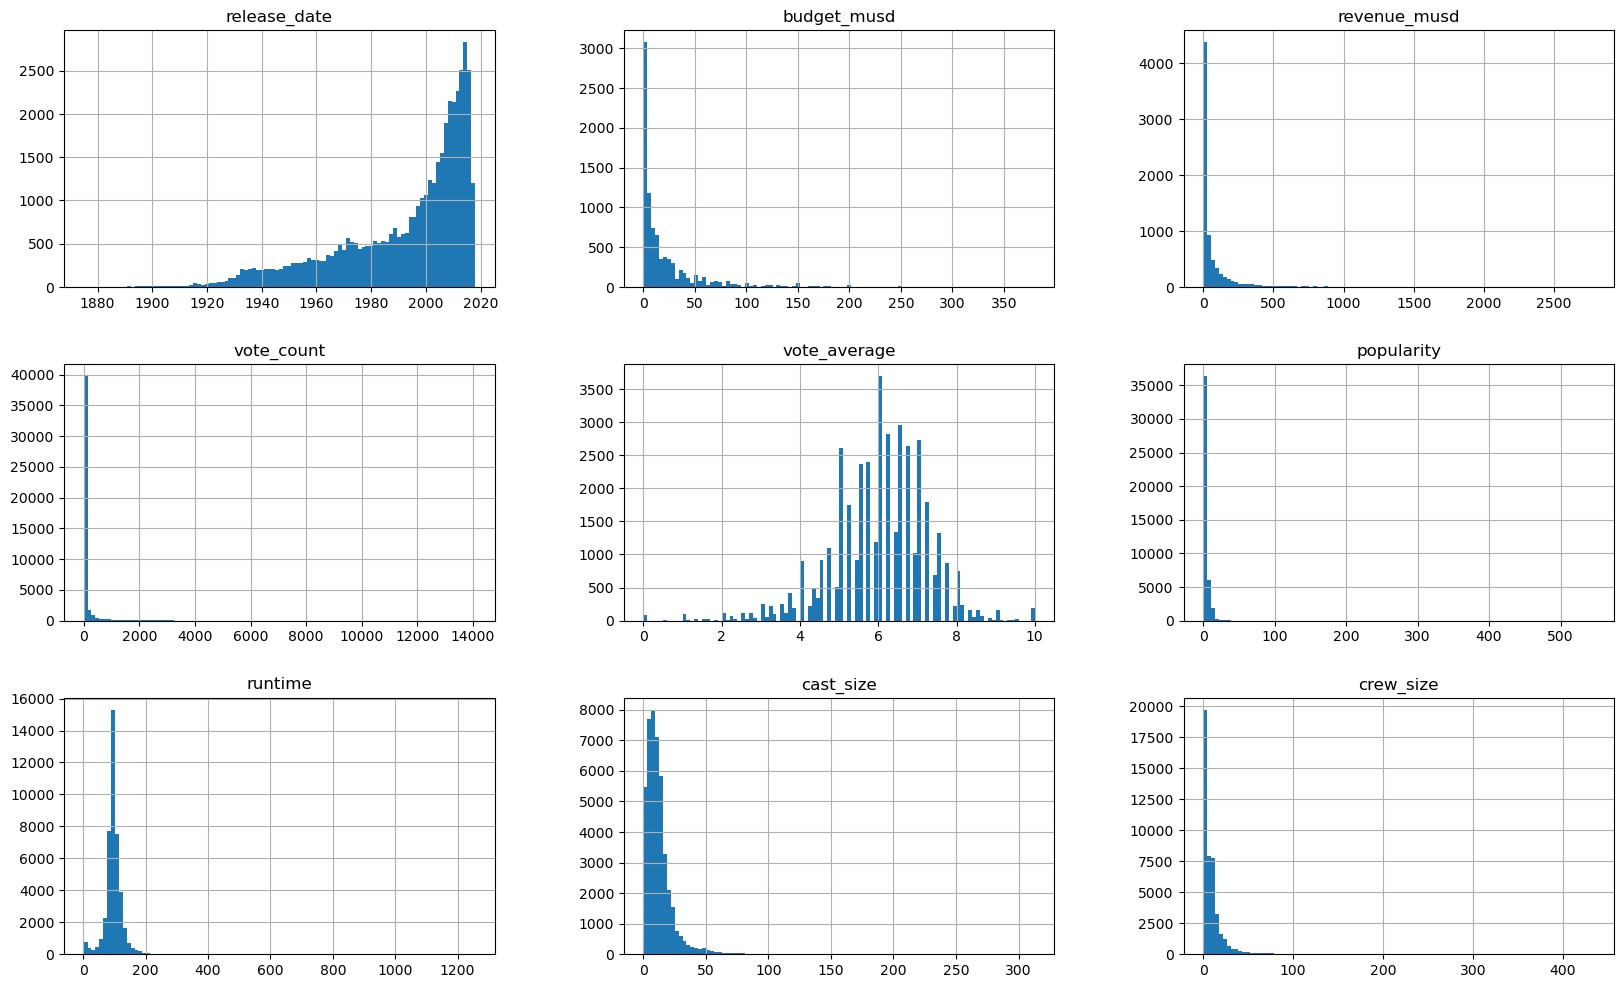

In [10]:
# distributions of different insights
df.hist(figsize=(20,12), bins=100)
plt.show()

In [11]:
# some statistics about text values
df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


## The best and the worst movies...

2. __Finding answers to the following questions: movies with the...__

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

In [12]:
from IPython.display import HTML

In [13]:
df.columns

Index(['title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
       'original_language', 'budget_musd', 'revenue_musd',
       'production_companies', 'production_countries', 'vote_count',
       'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages',
       'poster_path', 'cast', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [14]:
# creating new dataset with relevant columns
best_movies = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()
best_movies.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519


In [15]:
# creating new columns
best_movies['profit_musd'] = df['revenue_musd'].sub(df['budget_musd'])
best_movies['roi'] = df['revenue_musd'].div(df['budget_musd'])

In [16]:
# renaming columns to more appropriate names for presentations
best_movies.columns = ['', 'Title', 'Budget', 'Revenue', 'Votes',
       'Average Rating', 'Popularity', 'Profit', 'ROI']

In [17]:
best_movies.set_index('Title', inplace=True)

In [18]:
best_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          8854 non-null   float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [19]:
best_movies['Budget'].fillna(0, inplace=True)
best_movies['Votes'].fillna(0, inplace=True)

In [20]:
best_movies.loc[best_movies['Budget']>=5].nlargest(5, columns='ROI')

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.5,792.965326,3359.0,7.3,19.358546,782.465326,75.520507
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.0,368.744044,686.0,6.2,6.719949,363.744044,73.748809
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.0,775.398007,6778.0,8.1,42.149697,764.398007,70.490728
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.0,470.654000,2628.0,7.5,19.726114,463.654000,67.236286
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.0,328.203506,512.0,6.3,7.791212,323.203506,65.640701


In [21]:
# defining custom func to answer above questions
def get_best_worst(n, by, columns=None, ascending=False, min_budget=0, min_votes=0):
    if columns is None:
        columns = ["", by]
    else:
        columns = ["", by] + columns
        
    sub = best_movies.loc[(best_movies['Budget']>= min_budget) & (best_movies['Votes']>= min_votes),
                          columns].sort_values(by, ascending=ascending).head(n).copy()
    return HTML(sub.to_html(escape=False))

In [22]:
# top 5 movies with highest budget
get_best_worst(5, 'Budget')

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
Transformers: The Last Knight,,260.0


In [23]:
# top 5 movies with highest revenue
get_best_worst(5, 'Revenue', columns=['Budget', 'ROI'])

,,Revenue,Budget,ROI
Title,,,,
Avatar,,2787.965087,237.0,11.763566
Star Wars: The Force Awakens,,2068.223624,245.0,8.441729
Titanic,,1845.034188,200.0,9.225171
The Avengers,,1519.557910,220.0,6.907081
Jurassic World,,1513.528810,150.0,10.090192


In [24]:
# top 5 movies with highest profit
get_best_worst(5, 'Profit')

,,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


In [25]:
# top 5 movies with lowest profit
get_best_worst(5, 'Profit', ascending=True, columns=['Budget'])

,,Profit,Budget
Title,,,
The Lone Ranger,,-165.710090,255.000000
The Alamo,,-119.180039,145.000000
Mars Needs Moms,,-111.007242,150.000000
Valerian and the City of a Thousand Planets,,-107.447384,197.471676
The 13th Warrior,,-98.301101,160.000000


In [26]:
# top 5 movies with highest ROI
get_best_worst(5, 'ROI', min_budget=10, columns=['Budget', 'Revenue', 'Profit'])

,,ROI,Budget,Revenue,Profit
Title,,,,,
E.T. the Extra-Terrestrial,,75.520507,10.5,792.965326,782.465326
Star Wars,,70.490728,11.0,775.398007,764.398007
Pretty Woman,,33.071429,14.0,463.000000,449.000000
The Intouchables,,32.806221,13.0,426.480871,413.480871
The Empire Strikes Back,,29.911111,18.0,538.400000,520.400000


In [27]:
# top 5 movies with lowest ROI
get_best_worst(5, 'ROI', min_budget=10, columns=['Budget', 'Revenue', 'Profit'], ascending=True)

,,ROI,Budget,Revenue,Profit
Title,,,,,
Chasing Liberty,,5.217391e-07,23.0,0.000012,-22.999988
The Cookout,,7.500000e-07,16.0,0.000012,-15.999988
Deadfall,,1.800000e-06,10.0,0.000018,-9.999982
In the Cut,,1.916667e-06,12.0,0.000023,-11.999977
The Samaritan,,2.100833e-04,12.0,0.002521,-11.997479


In [28]:
# top 5 movies with highest number of votes
get_best_worst(5, 'Votes', columns=['Average Rating'])

,,Votes,Average Rating
Title,,,
Inception,,14075.0,8.1
The Dark Knight,,12269.0,8.3
Avatar,,12114.0,7.2
The Avengers,,12000.0,7.4
Deadpool,,11444.0,7.4


In [29]:
# top 5 movies with highest rating
get_best_worst(5, "Average Rating", min_votes=100, columns=['Votes'])

,,Average Rating,Votes
Title,,,
Dilwale Dulhania Le Jayenge,,9.1,661.0
Planet Earth,,8.8,176.0
Your Name.,,8.5,1030.0
The Shawshank Redemption,,8.5,8358.0
The Godfather,,8.5,6024.0


In [30]:
# top 5 movies by popularity
get_best_worst(5, 'Popularity')

,,Popularity
Title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


## Doing specific analysis

__Most Successful 5 Pixar Studio Movies between 2010 and 2017__

In [31]:
df.head(3)

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


In [280]:
df['release_date'].value_counts(dropna=False)

2008-01-01    135
2007-01-01    118
2009-01-01    117
2005-01-01    110
2006-01-01    100
             ... 
1980-03-18      1
1979-04-07      1
1931-07-11      1
1949-02-05      1
1917-10-21      1
Name: release_date, Length: 17275, dtype: int64

In [32]:
mask_company = df['production_companies'].str.lower().str.contains('pixar').fillna(False)

In [33]:
mask_date = df['release_date'].between('2010-01-01', '2017-12-31')

In [34]:
pixar = df.loc[mask_company & mask_date, 
              ['title', 'poster_path', 'revenue_musd', 'release_date', 'budget_musd']]\
              .sort_values('revenue_musd', ascending=False).set_index('title').head(5)

In [35]:
HTML(pixar.to_html(escape=False))

,poster_path,revenue_musd,release_date,budget_musd
title,,,,
Toy Story 3,,1066.969703,2010-06-16,200.0
Finding Dory,,1028.570889,2016-06-16,200.0
Inside Out,,857.611174,2015-06-09,175.0
Monsters University,,743.559607,2013-06-20,200.0
Cars 2,,559.852396,2011-06-11,200.0


__Most common words in movie titles__

In [38]:
from wordcloud import WordCloud

In [39]:
title = df['title'].dropna()

In [40]:
title_words = ' '.join(title)

In [49]:
title_wordcloud = WordCloud(width=4000, height=2000, max_words=200, background_color='white').generate(title_words)

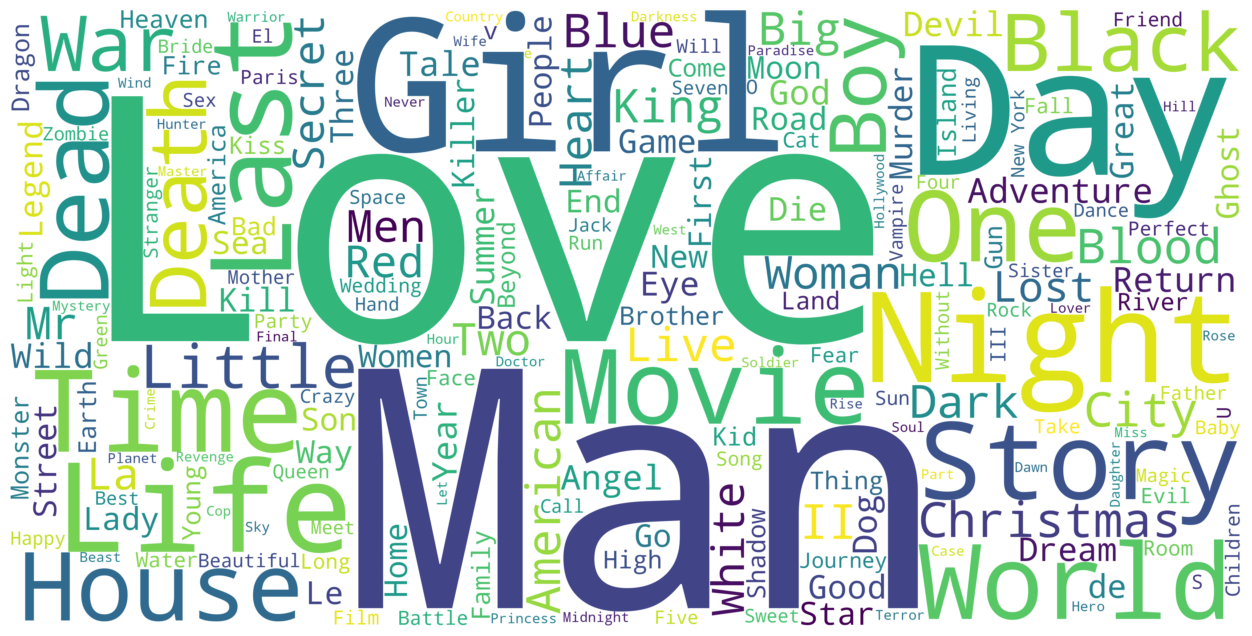

In [60]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Franchises and non-franchises comparison

In [73]:
df.head(3)

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,franchise
0,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,True
1,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,False
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,True


In [89]:
df['franchise'] = df.belongs_to_collection.notna().replace({True:'Franchise', False:'Stand-alone'})

In [91]:
df.franchise.value_counts()

Stand-alone    40228
Franchise       4463
Name: franchise, dtype: int64

In [92]:
gr_franchise = df.groupby('franchise')

__Franchise vs. Stand-alone: Average Revenue__

In [198]:
plt.style.use('ggplot')

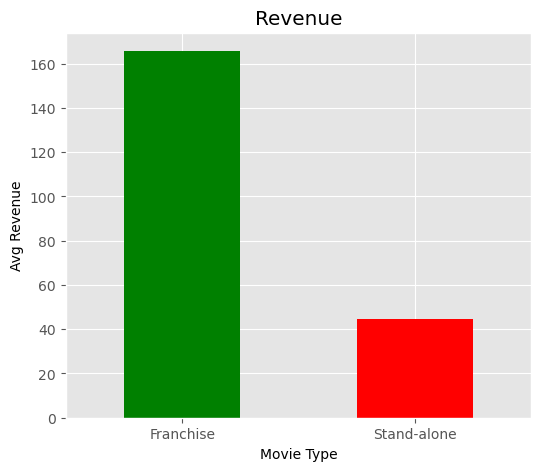

In [199]:
gr_franchise['revenue_musd'].mean().plot(kind='bar', 
                                         figsize=(6,5),
                                         title='Revenue',
                                         rot=0,
                                         xlabel='Movie Type',
                                         ylabel='Avg Revenue',
                                         color=['green','red'])
plt.show()

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [118]:
df['roi'] = df.revenue_musd.div(df.budget_musd)

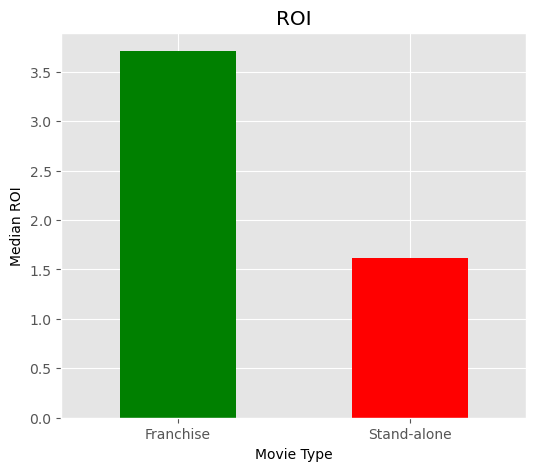

In [200]:
gr_franchise['roi'].median().plot(kind='bar', 
                                         figsize=(6,5),
                                         title='ROI',
                                         rot=0,
                                         xlabel='Movie Type',
                                         ylabel='Median ROI',
                                         color=['green','red'])
plt.show()

__Franchise vs. Stand-alone: Average Budget__

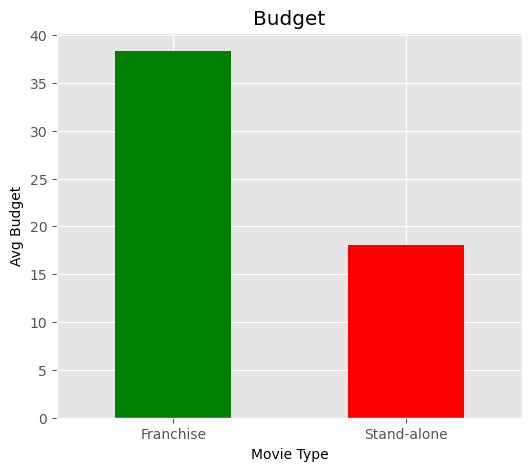

In [201]:
gr_franchise['budget_musd'].mean().plot(kind='bar', 
                                         figsize=(6,5),
                                         title='Budget',
                                         rot=0,
                                         xlabel='Movie Type',
                                         ylabel='Avg Budget',
                                         color=['green','red'])
plt.show()

__Franchise vs. Stand-alone: Average Popularity__

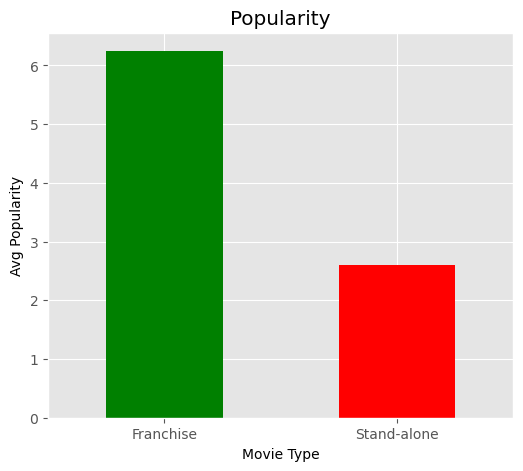

In [202]:
gr_franchise['popularity'].mean().plot(kind='bar', 
                                         figsize=(6,5),
                                         title='Popularity',
                                         rot=0,
                                         xlabel='Movie Type',
                                         ylabel='Avg Popularity',
                                         color=['green','red'])
plt.show()

__Franchise vs. Stand-alone: Average Rating__

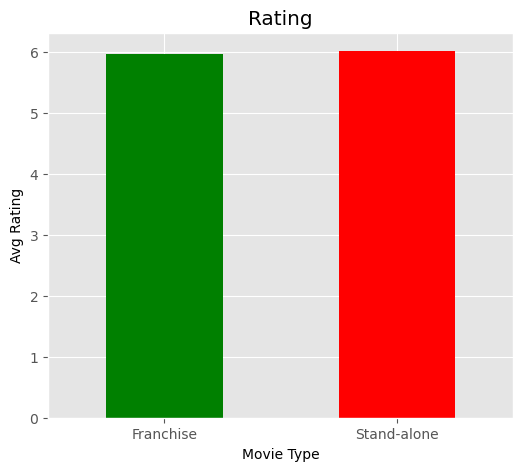

In [203]:
gr_franchise['vote_average'].mean().plot(kind='bar', 
                                         figsize=(6,5),
                                         title='Rating',
                                         rot=0,
                                         xlabel='Movie Type',
                                         ylabel='Avg Rating',
                                         color=['green','red'])
plt.show()

__General Overview__

In [207]:
gr_franchise.agg({'budget_musd':'mean', 'revenue_musd':'mean', 'vote_average':'mean', 
                  'popularity':'mean', 'roi':'median', 'vote_count':'mean'}).round(2)

,budget_musd,revenue_musd,vote_average,popularity,roi,vote_count
franchise,,,,,,
Franchise,38.32,165.71,5.96,6.25,3.71,412.39
Stand-alone,18.05,44.74,6.01,2.59,1.62,78.29


## Most Successful Franchises

#### Rate Distribution of Collections

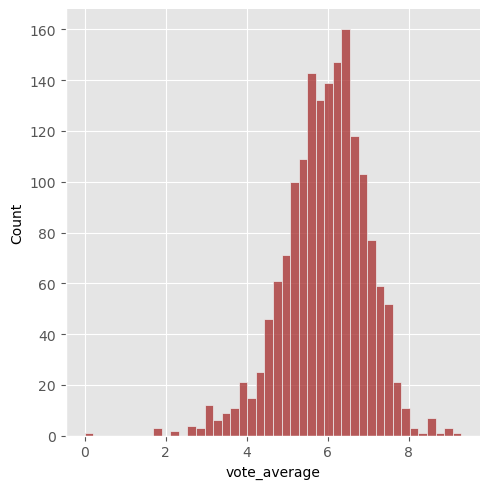

In [204]:
collections = df.loc[df['franchise']=='Franchise'].groupby('belongs_to_collection')['vote_average'].mean()
sns.displot(data=collections, color='brown')
plt.show()

- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [209]:
franchises = df.groupby('belongs_to_collection').agg({'title':'count',
                                                      'budget_musd':['sum', 'mean'],
                                                      'revenue_musd':['sum', 'mean'],
                                                      'vote_average':'mean',
                                                      'popularity':'mean',
                                                      'roi':'median',
                                                      'vote_count':'mean'})

In [219]:
franchises.agg(c)

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
... Has Fallen Collection             183.390043         6.00  13.008090   
00 Schneider Filmreihe                       NaN         6.50   1.931299   
08/15 Collection                             NaN         5.90   0.628127   
100 Girls Collection                         NaN         5.15   3.078652   
101 Dalmatians (Animated) Collection  215.880014         6.25  13.063212   
...                                          ...          ...        ...   
Сказки Чуковского                            NaN         3.00   0.731334   
Чебурашка и крокодил Гена                    NaN         6.70   0.881504   
Что Творят мужчины! (Коллекция)              NaN         3.15   1.299605   
男はつらいよ シリーズ                                  NaN         7.00   0.038901   
식객 시리즈                                       NaN         4.95   0.157245   

                                            roi   vote_count  
                                         median         mean  
belongs_to_collection                                         
... Has Fallen Collection              2.864804  2333.000000  
00 Schneider Filmreihe                      NaN    16.000000  
08/15 Collection                            NaN     4.000000  
100 Girls Collection                        NaN    64.000000  
101 Dalmatians (Animated) Collection  53.970003   937.000000  
...                                         ...          ...  
Сказки Чуковского                           NaN     3.000000  
Чебурашка и крокодил Гена                   NaN     7.000000  
Что Творят мужчины! (Коллекция)             NaN     5.500000  
男はつらいよ シリーズ                                 NaN     0.666667  
식객 시리즈                                      NaN     3.500000  

[1691 rows x 9 columns]

__Top 20 collections by number of movies__

In [217]:
franchises.nlargest(20, ('title','count'))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   
Uuno Turhapuro                            15      0.0000        NaN   
Monster High Collection                   14      0.5000   0.500000   
The Land Before Time Collection           14     12.3000  12.300000   
George Carlin Comedy Collection           13      0.0000        NaN   
Sharpe Collection                         13      0.0000        NaN   
Friday the 13th Collection                12     84.4000   7.033333   
Johan Falk GSI Collection                 12      0.0000        NaN   
Sherlock Holmes (1939 series)             12      0.0000        NaN   
The Amityville Horror Collection          12     21.0200   5.255000   
An American Girl Collection               10      6.8000   6.800000   

                                       revenue_musd             vote_average  \
                                                sum        mean         mean   
belongs_to_collection                                                          
The Bowery Boys                            0.000000         NaN     6.675000   
Totò Collection                            0.000000         NaN     6.837037   
James Bond Collection                   7106.970239  273.345009     6.338462   
Zatôichi: The Blind Swordsman              0.000000         NaN     6.403846   
The Carry On Collection                    0.000000         NaN     6.168000   
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     6.609524   
Pokémon Collection                       601.865958   66.873995     6.055000   
Godzilla (Showa) Collection                0.000000         NaN     5.975000   
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.658333   
Dragon Ball Z (Movie) Collection         112.121192   56.060596     6.606667   
Uuno Turhapuro                             0.000000         NaN     5.526667   
Monster High Collection                    0.000000         NaN     6.485714   
The Land Before Time Collection           84.460846   84.460846     6.164286   
George Carlin Comedy Collection            0.000000         NaN     7.469231   
Sharpe Collection                          0.000000         NaN     6.738462   
Friday the 13th Collection               464.898544   38.741545     5.425000   
Johan Falk GSI Collection                  0.000000         NaN     6.500000   
Sherlock Holmes (1939 series)              0.000000         NaN     6.925000   
The Amityville Horror Collection         213.347083   53.336771     4.358333   
An American Girl Collection                0.000000         NaN     5.250000   

                                       popularity        roi   vote_count  
                                             mean     median         mean  
belongs_to_collection                                                      
The Bowery Boys                          0.198006        NaN     0.724138  
Totò Collection                          1.047324        NaN    18.037037  
James Bond Collection                   13.453502   6.128922  1284.307692  
Zatôichi: The Blind Swordsman            1.100603        NaN    11.192308  
The Carry On Collection         

__Top 20 collections by total budget__

In [220]:
franchises.nlargest(20, ('budget_musd', 'sum'))

title budget_musd              \
                                        count         sum        mean   
belongs_to_collection                                                   
James Bond Collection                      26     1539.65   59.217308   
Harry Potter Collection                     8     1280.00  160.000000   
Pirates of the Caribbean Collection         5     1250.00  250.000000   
The Fast and the Furious Collection         8     1009.00  126.125000   
X-Men Collection                            6      983.00  163.833333   
Transformers Collection                     5      965.00  193.000000   
Star Wars Collection                        8      854.35  106.793750   
The Hobbit Collection                       3      750.00  250.000000   
The Terminator Collection                   5      661.40  132.280000   
Mission: Impossible Collection              5      650.00  130.000000   
Spider-Man Collection                       3      597.00  199.000000   
The Dark Knight Collection                  3      585.00  195.000000   
Captain America Collection                  3      560.00  186.666667   
The Chronicles of Narnia Collection         3      560.00  186.666667   
Iron Man Collection                         3      540.00  180.000000   
Shrek Collection                            5      535.00  133.750000   
Star Trek: Alternate Reality Collection     3      525.00  175.000000   
Madagascar Collection                       4      502.00  125.500000   
The Avengers Collection                     2      500.00  250.000000   
Cars Collection                             3      495.00  165.000000   

                                        revenue_musd               \
                                                 sum         mean   
belongs_to_collection                                               
James Bond Collection                    7106.970239   273.345009   
Harry Potter Collection                  7707.367425   963.420928   
Pirates of the Caribbean Collection      4521.576826   904.315365   
The Fast and the Furious Collection      5125.098793   640.637349   
X-Men Collection                         2808.832317   468.138720   
Transformers Collection                  4366.101244   873.220249   
Star Wars Collection                     7434.494790   929.311849   
The Hobbit Collection                    2935.523356   978.507785   
The Terminator Collection                1845.327738   369.065548   
Mission: Impossible Collection           2778.977995   555.795599   
Spider-Man Collection                    2496.346518   832.115506   
The Dark Knight Collection               2463.716216   821.238739   
Captain America Collection               2238.640841   746.213614   
The Chronicles of Narnia Collection      1584.144587   528.048196   
Iron Man Collection                      2424.547547   808.182516   
Shrek Collection                         2955.807008   738.951752   
Star Trek: Alternate Reality Collection  1196.517508   398.839169   
Madagascar Collection                    2257.054393   564.263598   
The Avengers Collection                  2924.961604  1462.480802   
Cars Collection                          1372.005602   457.335201   

                                        vote_average popularity       roi  \
                                                mean       mean    median   
belongs_to_collection                                                       
James Bond Collection                       6.338462  13.453502  6.128922   
Harry Potter Collection                     7.537500  26.253893  6.165086   
Pirates of the Caribbean Collection         6.880000  53.972237  3.453009   
The Fast and the Furious Collection         6.662500  10.799435  4.942154   
X-Men Collection                            6.816667   9.707541  3.023632   
Transformers Collection                     6.140000  14.425077  5.197167   
Star Wars Collection                        7.375000  23.410919  8.239637   
Th

__Top 20 collections by average budget__

In [221]:
franchises.nlargest(20, ('budget_musd', 'mean'))

title budget_musd              \
                                        count         sum        mean   
belongs_to_collection                                                   
Tangled Collection                          2       260.0  260.000000   
Pirates of the Caribbean Collection         5      1250.0  250.000000   
The Avengers Collection                     2       500.0  250.000000   
The Hobbit Collection                       3       750.0  250.000000   
Man of Steel Collection                     2       475.0  237.500000   
Avatar Collection                           1       237.0  237.000000   
The Amazing Spider-Man Collection           2       415.0  207.500000   
World War Z Collection                      1       200.0  200.000000   
Spider-Man Collection                       3       597.0  199.000000   
The Dark Knight Collection                  3       585.0  195.000000   
Transformers Collection                     5       965.0  193.000000   
Captain America Collection                  3       560.0  186.666667   
The Chronicles of Narnia Collection         3       560.0  186.666667   
Alice in Wonderland Collection              2       370.0  185.000000   
Guardians of the Galaxy Collection          2       370.0  185.000000   
Fantastic Beasts Collection                 1       180.0  180.000000   
Iron Man Collection                         3       540.0  180.000000   
Pacific Rim Collection                      1       180.0  180.000000   
Star Trek: Alternate Reality Collection     3       525.0  175.000000   
Cars Collection                             3       495.0  165.000000   

                                        revenue_musd               \
                                                 sum         mean   
belongs_to_collection                                               
Tangled Collection                        591.794936   591.794936   
Pirates of the Caribbean Collection      4521.576826   904.315365   
The Avengers Collection                  2924.961604  1462.480802   
The Hobbit Collection                    2935.523356   978.507785   
Man of Steel Collection                  1536.105712   768.052856   
Avatar Collection                        2787.965087  2787.965087   
The Amazing Spider-Man Collection        1457.933289   728.966645   
World War Z Collection                    531.865000   531.865000   
Spider-Man Collection                    2496.346518   832.115506   
The Dark Knight Collection               2463.716216   821.238739   
Transformers Collection                  4366.101244   873.220249   
Captain America Collection               2238.640841   746.213614   
The Chronicles of Narnia Collection      1584.144587   528.048196   
Alice in Wonderland Collection           1324.861194   662.430597   
Guardians of the Galaxy Collection       1636.744770   818.372385   
Fantastic Beasts Collection               809.342332   809.342332   
Iron Man Collection                      2424.547547   808.182516   
Pacific Rim Collection                    407.602906   407.602906   
Star Trek: Alternate Reality Collection  1196.517508   398.839169   
Cars Collection                          1372.005602   457.335201   

                                        vote_average  popularity        roi  \
                                                mean        mean     median   
belongs_to_collection                                                         
Tangled Collection                          7.250000   12.319364   2.276134   
Pirates of the Caribbean Collection         6.880000   53.972237   3.453009   
The Avengers Collection                     7.350000   63.633534   5.963190   
The Hobbit Collection                       7.233333   25.205614   3.833600   
Man of Steel Collection                     6.100000   24.987357   3.219510   
Avatar Collection                           7.200000  185.070892  11.763566   
The Amazing Spider-Man Collection           6.500000   28.669

__Top 20 collections by total revenue__

In [223]:
franchises.nlargest(20, ('revenue_musd', 'sum'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
James Bond Collection                  26     1539.65   59.217308   
The Fast and the Furious Collection     8     1009.00  126.125000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
Transformers Collection                 5      965.00  193.000000   
Despicable Me Collection                6      299.00   74.750000   
The Twilight Collection                 5      385.00   77.000000   
Ice Age Collection                      5      429.00   85.800000   
Jurassic Park Collection                4      379.00   94.750000   
Shrek Collection                        5      535.00  133.750000   
The Hunger Games Collection             4      490.00  122.500000   
The Hobbit Collection                   3      750.00  250.000000   
The Avengers Collection                 2      500.00  250.000000   
The Lord of the Rings Collection        3      266.00   88.666667   
X-Men Collection                        6      983.00  163.833333   
Avatar Collection                       1      237.00  237.000000   
Mission: Impossible Collection          5      650.00  130.000000   
Spider-Man Collection                   3      597.00  199.000000   
The Dark Knight Collection              3      585.00  195.000000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
Harry Potter Collection              7707.367425   963.420928     7.537500   
Star Wars Collection                 7434.494790   929.311849     7.375000   
James Bond Collection                7106.970239   273.345009     6.338462   
The Fast and the Furious Collection  5125.098793   640.637349     6.662500   
Pirates of the Caribbean Collection  4521.576826   904.315365     6.880000   
Transformers Collection              4366.101244   873.220249     6.140000   
Despicable Me Collection             3691.070216   922.767554     6.783333   
The Twilight Collection              3342.107290   668.421458     5.840000   
Ice Age Collection                   3216.708553   643.341711     6.380000   
Jurassic Park Collection             3031.484143   757.871036     6.500000   
Shrek Collection                     2955.807008   738.951752     6.460000   
The Hunger Games Collection          2944.162634   736.040659     6.875000   
The Hobbit Collection                2935.523356   978.507785     7.233333   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
X-Men Collection                     2808.832317   468.138720     6.816667   
Avatar Collection                    2787.965087  2787.965087     7.200000   
Mission: Impossible Collection       2778.977995   555.795599     6.600000   
Spider-Man Collection                2496.346518   832.115506     6.466667   
The Dark Knight Collection           2463.716216   821.238739     7.800000   

                                     popularity        roi    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
Harry Potter Collection               26.253893   6.165086   5983.250000  
Star Wars Collection                  23.410919   8.239637   5430.375000  
James Bond Collection                 13.453502   6.128922   1284.307692  
The Fast and the Furious Collection   10.799435   4.942154   3197.000000  
Pirates of the Caribbean Collection   53.972237   3.453009   5016.000000  
Transformers Collection               14.425077   5.1

__Top 20 collections by average revenue__

In [224]:
franchises.nlargest(20, ('revenue_musd', 'mean'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Avatar Collection                       1      237.00  237.000000   
The Avengers Collection                 2      500.00  250.000000   
Frozen Collection                       2      150.00  150.000000   
Finding Nemo Collection                 2      294.00  147.000000   
The Hobbit Collection                   3      750.00  250.000000   
The Lord of the Rings Collection        3      266.00   88.666667   
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
Despicable Me Collection                6      299.00   74.750000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
The Secret Life of Pets Collection      1       75.00   75.000000   
Transformers Collection                 5      965.00  193.000000   
Spider-Man Collection                   3      597.00  199.000000   
The Dark Knight Collection              3      585.00  195.000000   
Wonder Woman Collection                 1      149.00  149.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Fantastic Beasts Collection             1      180.00  180.000000   
Iron Man Collection                     3      540.00  180.000000   
The Lion King Collection                4       45.00   45.000000   
Deadpool Collection                     1       58.00   58.000000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
Avatar Collection                    2787.965087  2787.965087     7.200000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
Frozen Collection                    1274.219009  1274.219009     7.100000   
Finding Nemo Collection              1968.906425   984.453213     7.200000   
The Hobbit Collection                2935.523356   978.507785     7.233333   
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Star Wars Collection                 7434.494790   929.311849     7.375000   
Despicable Me Collection             3691.070216   922.767554     6.783333   
Pirates of the Caribbean Collection  4521.576826   904.315365     6.880000   
The Secret Life of Pets Collection    875.457937   875.457937     5.900000   
Transformers Collection              4366.101244   873.220249     6.140000   
Spider-Man Collection                2496.346518   832.115506     6.466667   
The Dark Knight Collection           2463.716216   821.238739     7.800000   
Wonder Woman Collection               820.580447   820.580447     7.200000   
Guardians of the Galaxy Collection   1636.744770   818.372385     7.750000   
Fantastic Beasts Collection           809.342332   809.342332     7.200000   
Iron Man Collection                  2424.547547   808.182516     6.933333   
The Lion King Collection              788.241776   788.241776     6.750000   
Deadpool Collection                   783.112979   783.112979     7.400000   

                                     popularity        roi    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
Avatar Collection                    185.070892  11.763566  12114.000000  
The Avengers Collection               63.633534   5.963190   9454.000000  
Frozen Collection                     16.878788   8.494793   3035.000000  
Finding Nemo Collection               19.987735   7.573212   5312.500000  
The Hobbit Collection                 25.205614   3.833600   5981.333333  
The Lord of the Rings Collection      30.272873  11.7

__Top 20 collections by rate__

In [226]:
franchises[franchises[('vote_count', 'mean')]>=1000].nlargest(20, ('vote_average', 'mean'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3      266.00   88.666667   
The Godfather Collection                3       73.00   24.333333   
Blade Runner Collection                 1       28.00   28.000000   
The Man With No Name Collection         3        2.00    0.666667   
The Dark Knight Collection              3      585.00  195.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Kill Bill Collection                    2       60.00   30.000000   
Kingsman Collection                     1       81.00   81.000000   
How to Train Your Dragon Collection     2      310.00  155.000000   
Harry Potter Collection                 8     1280.00  160.000000   
Toy Story Collection                    3      320.00  106.666667   
Back to the Future Collection           3       99.00   33.000000   
Trainspotting Collection                2       22.00   11.000000   
Deadpool Collection                     1       58.00   58.000000   
The Incredibles Collection              1       92.00   92.000000   
Star Wars Collection                    8      854.35  106.793750   
The Avengers Collection                 2      500.00  250.000000   
The Lego Movie Collection               2      140.00   70.000000   
Tangled Collection                      2      260.00  260.000000   
The Space Odyssey Series                2       38.50   19.250000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
The Godfather Collection              429.375314   143.125105     7.966667   
Blade Runner Collection                33.139618    33.139618     7.900000   
The Man With No Name Collection        35.500000    11.833333     7.833333   
The Dark Knight Collection           2463.716216   821.238739     7.800000   
Guardians of the Galaxy Collection   1636.744770   818.372385     7.750000   
Kill Bill Collection                  333.108461   166.554231     7.700000   
Kingsman Collection                   414.351546   414.351546     7.600000   
How to Train Your Dragon Collection  1104.001807   552.000904     7.550000   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Toy Story Collection                 1937.890605   645.963535     7.533333   
Back to the Future Collection         957.637345   319.212448     7.500000   
Trainspotting Collection               57.903789    28.951895     7.450000   
Deadpool Collection                   783.112979   783.112979     7.400000   
The Incredibles Collection            631.442092   631.442092     7.400000   
Star Wars Collection                 7434.494790   929.311849     7.375000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lego Movie Collection             781.111076   390.555538     7.350000   
Tangled Collection                    591.794936   591.794936     7.250000   
The Space Odyssey Series              109.100657    54.550329     7.250000   

                                     popularity        roi    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
The Lord of the Rings Collection      30.272873  11.725157   8253.000000  
The Godfather Collection              31.641307   3.657142   3677.000000  
Blade Runner Collection               96.272374   1.183558   3833.000000  
The Man With No Name Collection       14.171278  25.000000   1422.666667  
The Dark Knight Collection            57.418393   4.339756   9681.000000  
Guardians of the Galaxy Collection   119.311296   4.4

__Top 20 collections by ROI__

In [227]:
franchises.nlargest(20, ('roi', 'median'))

title budget_musd             \
                                          count         sum       mean   
belongs_to_collection                                                    
Blair Witch Collection                        3    5.060000   2.530000   
Super Size Me Collection                      1    0.065000   0.065000   
Open Water Collection                         2    1.330000   0.665000   
Bambi Collection                              2    0.858000   0.858000   
The Hills Have Eyes (Original) Collection     2    0.930000   0.465000   
Billy Jack Collection                         4    0.360007   0.180003   
Rocky Horror Collection                       2    1.200000   1.200000   
American Graffiti Collection                  2    3.277000   1.638500   
Cinderella Collection                         3   15.900000   5.300000   
Vixens Collection                             4    0.315000   0.157500   
Clerks Collection                             2    5.027000   2.513500   
101 Dalmatians (Animated) Collection          2    4.000000   4.000000   
Evil Dead Collection                          3   14.950000   4.983333   
Frankenstein (Universal Series)               5    0.684750   0.342375   
Look Who's Talking Collection                 3    7.500000   7.500000   
My Big Fat Greek Wedding Collection           2   23.000000  11.500000   
Annabelle Collection                          1    6.500000   6.500000   
Insidious Collection                          3   16.500000   5.500000   
Saturday Night Fever Collection               2   25.500000  12.750000   
Ghoulies Collection                           4    1.000000   1.000000   

                                          revenue_musd              \
                                                   sum        mean   
belongs_to_collection                                                
Blair Witch Collection                      293.172994  146.586497   
Super Size Me Collection                     28.575078   28.575078   
Open Water Collection                        54.667954   54.667954   
Bambi Collection                            267.447150  267.447150   
The Hills Have Eyes (Original) Collection    25.000000   25.000000   
Billy Jack Collection                        36.000000   36.000000   
Rocky Horror Collection                     112.892319  112.892319   
American Graffiti Collection                155.014674   77.507337   
Cinderella Collection                       263.591415  263.591415   
Vixens Collection                             6.000000    6.000000   
Clerks Collection                            30.039506   15.019753   
101 Dalmatians (Animated) Collection        215.880014  215.880014   
Evil Dead Collection                         35.323044   17.661522   
Frankenstein (Universal Series)              12.000000   12.000000   
Look Who's Talking Collection               296.000000  296.000000   
My Big Fat Greek Wedding Collection         457.667295  228.833647   
Annabelle Collection                        255.273813  255.273813   
Insidious Collection                        201.313001  100.656500   
Saturday Night Fever Collection             302.005854  151.002927   
Ghoulies Collection                          35.000000   35.000000   

                                          vote_average popularity  \
                                                  mean       mean   
belongs_to_collection                                               
Blair Witch Collection                        5.166667  10.510581   
Super Size Me Collection                      6.600000   5.266103   
Open Water Collection                         5.250000  11.076564   
Bambi Collection                              6.400000  10.744486   
The Hills Have Eyes (Original) Collection     5.200000   3.941166   
Billy Jack Collection                         6.250000   0.973566   
Rocky Horror Collection                       6.600000   5.360314   
American Graffiti Collection          

## Most Successful Directors

#### Top 20 directors by number of movies

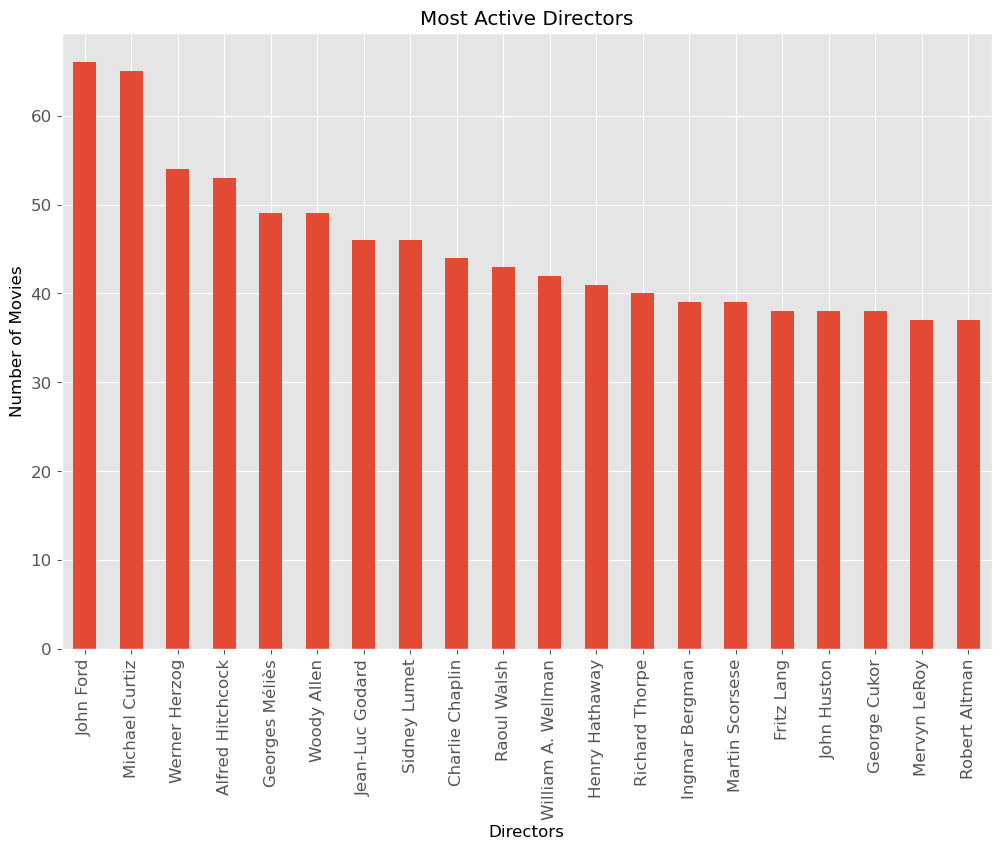

In [246]:
plt.figure(figsize=(12,8))
df.director.value_counts().head(20).plot(kind='bar', fontsize=12)
plt.title('Most Active Directors')
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Number of Movies',  fontsize=12)
plt.show()

#### Top 20 directors by revenue

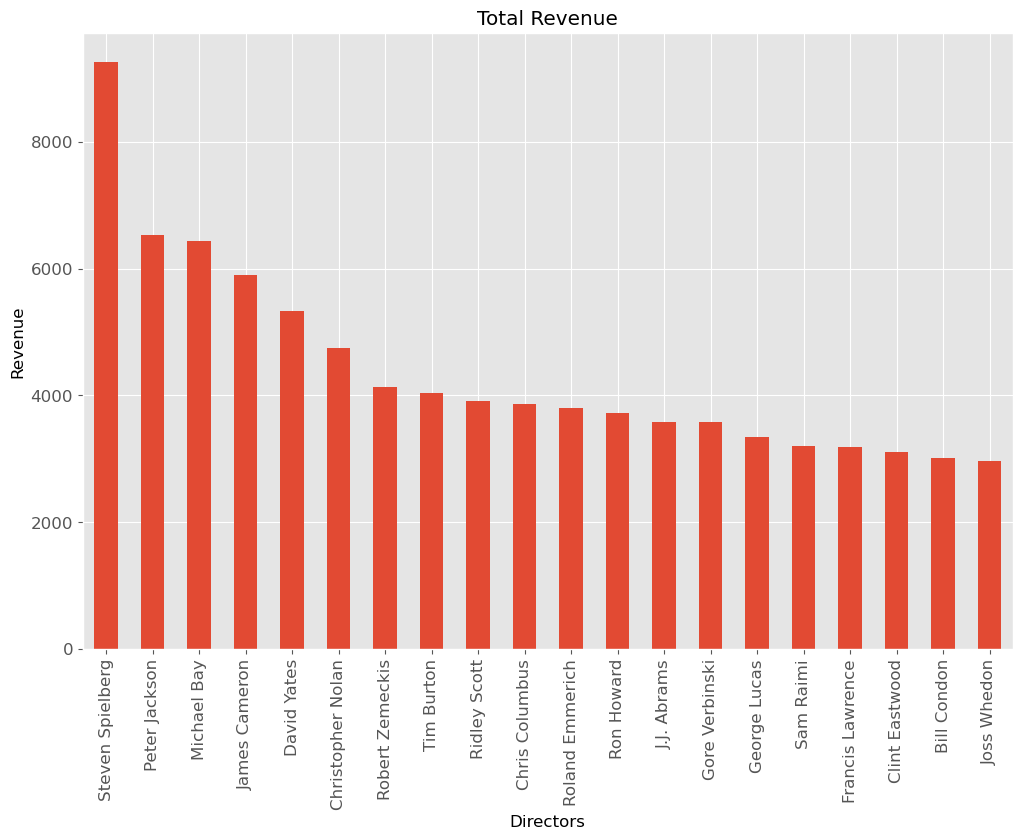

In [245]:
plt.figure(figsize=(12,8))
df.groupby('director')['revenue_musd'].sum().nlargest(20).plot(kind='bar', fontsize=12)
plt.title('Total Revenue')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Directors', fontsize=12)
plt.show()

## Most Successful Actors

In [275]:
# creating actors dataframe by splitting cast column and exploding it to the seperate rows
actors = df.cast.str.split('|').explode().dropna().to_frame()

In [277]:
actors.columns = ['actor']

In [279]:
# merging newly created actors df with our main df
actors = actors.merge(df[['title', 'revenue_musd', 'vote_average', 'popularity']],
                      left_index=True, 
                      right_index=True)

#### Number of actors

In [281]:
actors['actor'].nunique()

201501

#### Top 20 actors by number of movies

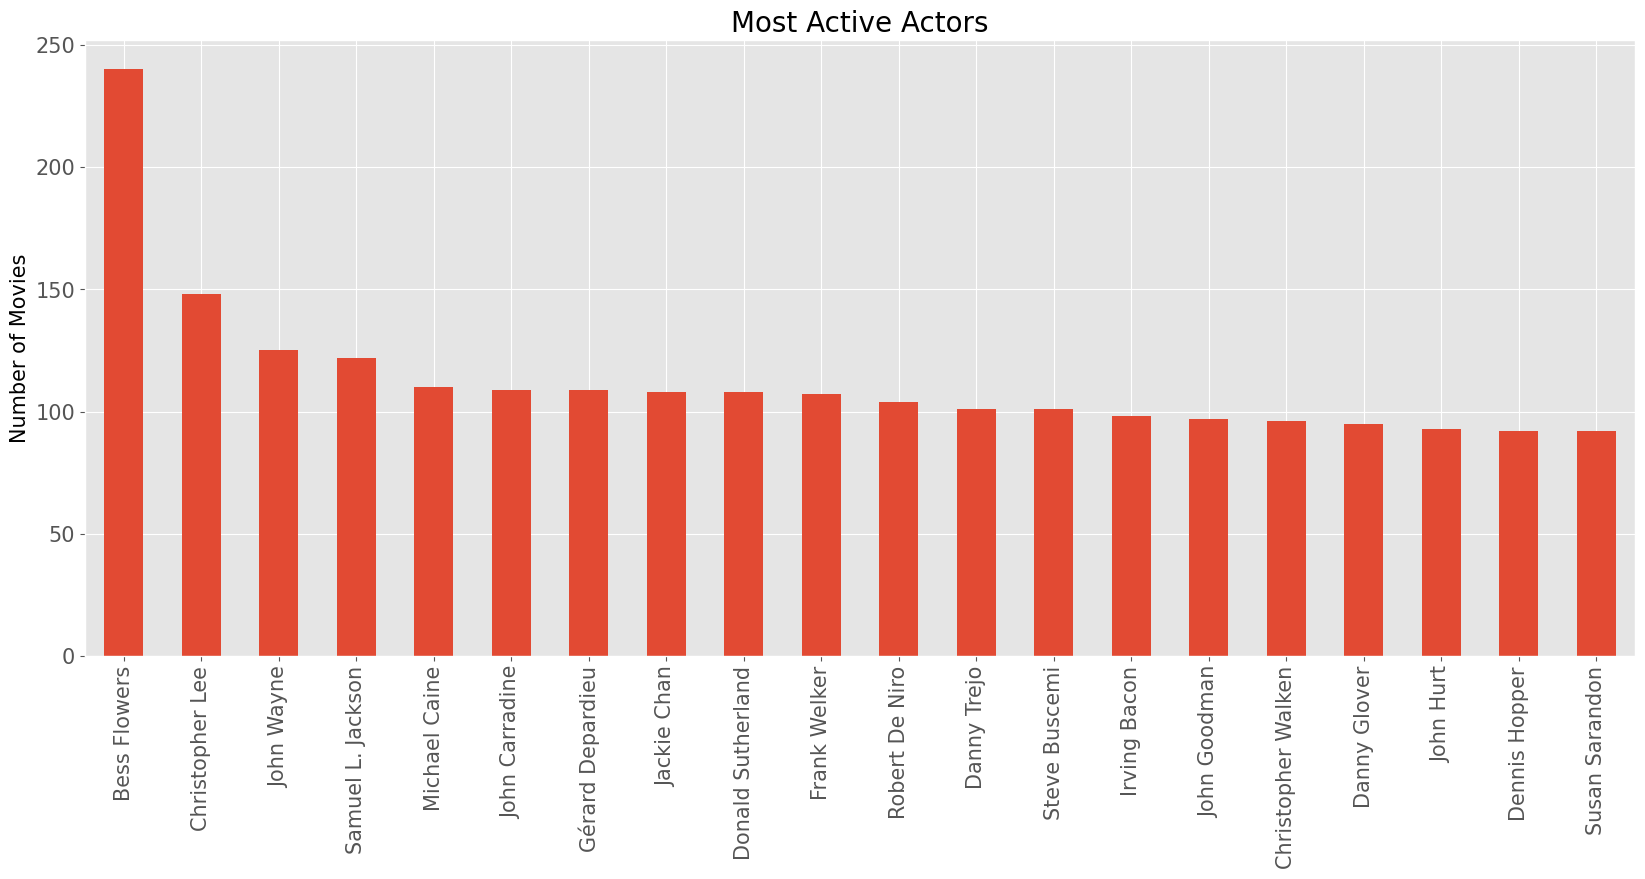

In [289]:
plt.figure(figsize=(20,8))
actors['actor'].value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title('Most Active Actors', fontsize=20)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

In [293]:
# groupping and aggregating 
act_agg = actors.groupby('actor').agg(total_revenue = ('revenue_musd', 'sum'),
                                      mean_revenue = ('revenue_musd', 'mean'),
                                      mean_rating = ('vote_average', 'mean'),
                                      mean_pop = ('popularity', 'mean'),
                                      total_movies = ('actor', 'count'))

#### Top 20 actors by revenue of movies

In [299]:
act_agg.nlargest(20, 'total_revenue')

,total_revenue,mean_revenue,mean_rating,mean_pop,total_movies
actor,,,,,
Stan Lee,19414.957555,647.165252,6.513043,29.936175,48
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Warwick Davis,13256.032188,662.801609,6.294118,13.088614,34
Frank Welker,13044.152470,326.103812,6.310377,9.571404,107
John Ratzenberger,12596.126073,449.861645,6.484444,10.959477,46
Jess Harnell,12234.608163,611.730408,6.435294,10.919015,35
Hugo Weaving,11027.578473,459.482436,6.473684,10.967890,40
Ian McKellen,11015.592318,478.938796,6.353488,15.447180,44
Johnny Depp,10653.760641,217.423687,6.440580,12.378196,69


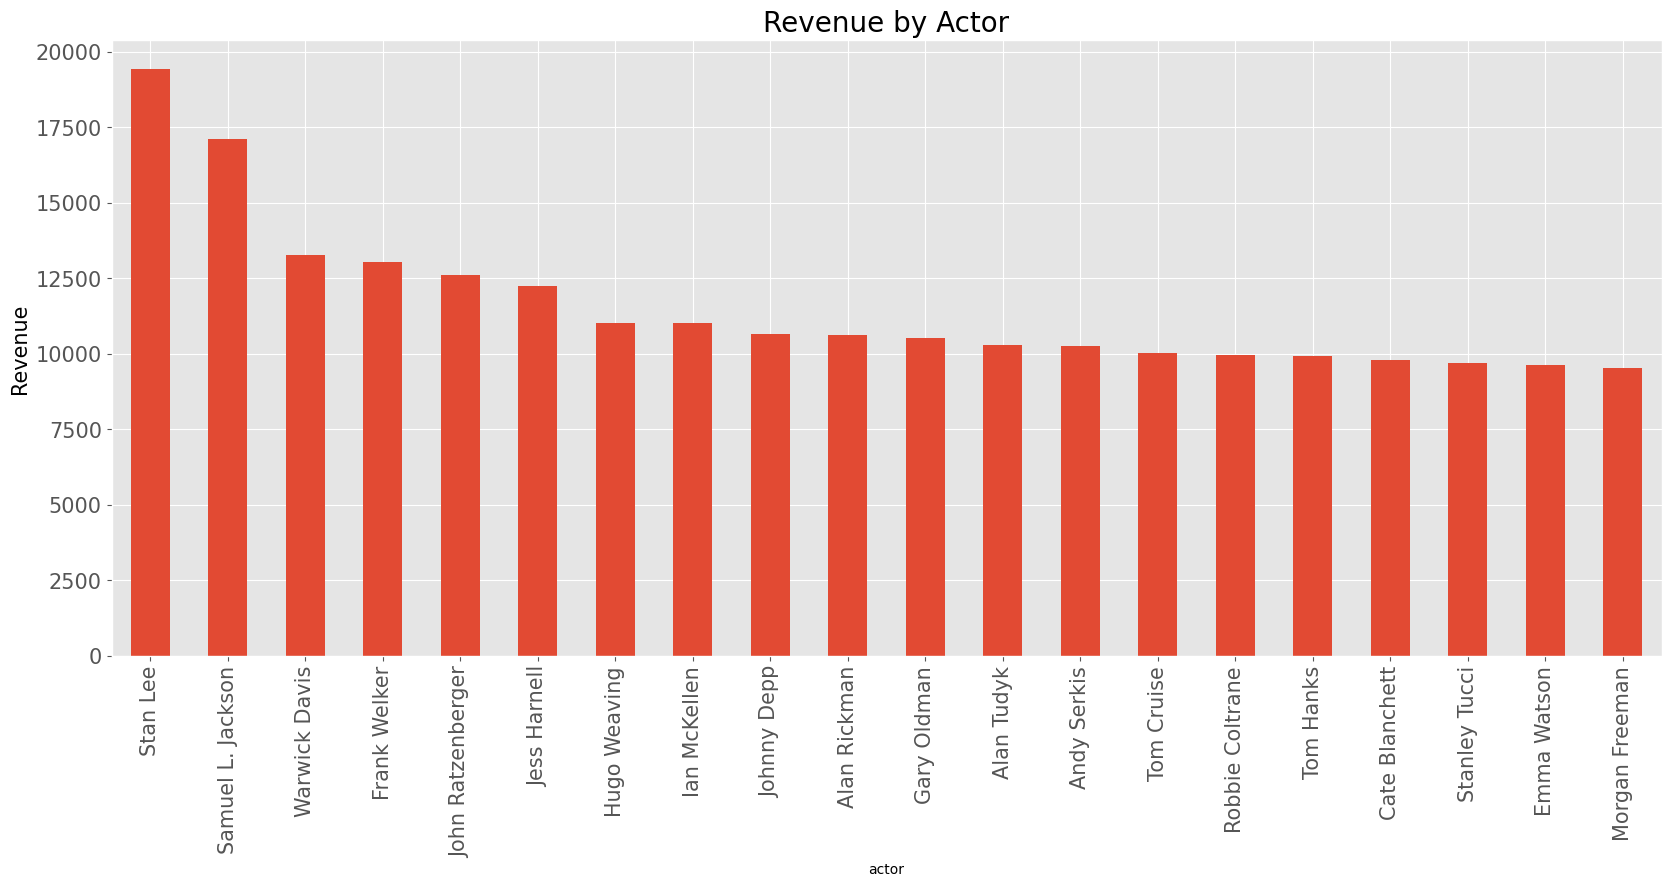

In [301]:
plt.figure(figsize=(20,8))
act_agg[''].nlargest(20).plot(kind='bar', fontsize=15)
plt.title('Revenue by Actor', fontsize=20)
plt.ylabel('Revenue', fontsize=15)
plt.show()

#### Top 20 actors by rating

In [307]:
act_agg[act_agg['total_movies']>10].nlargest(20, 'mean_rating')

,total_revenue,mean_revenue,mean_rating,mean_pop,total_movies
actor,,,,,
David Attenborough,0.000000,NaN,8.270000,2.147383,11
Yo Oizumi,511.210189,102.242038,7.723077,7.512642,13
Şener Şen,11.074013,3.691338,7.693333,0.912165,16
Akira Tani,0.327081,0.163541,7.654545,5.041536,12
Daisuke Katô,0.423649,0.141216,7.611111,3.428240,19
Adile Naşit,0.912800,0.456400,7.530769,0.578235,15
Haruko Sugimura,0.000000,NaN,7.526316,2.155955,19
Isao Kimura,0.327081,0.163541,7.490000,4.129724,11
Mitsuko Yoshikawa,0.000000,NaN,7.481818,0.437893,12


#### Top 20 actors by popularity

In [308]:
act_agg[act_agg['total_movies']>10].nlargest(20, 'mean_pop')

,total_revenue,mean_revenue,mean_rating,mean_pop,total_movies
actor,,,,,
Katy Mixon,1519.572457,151.957246,5.841667,51.974337,12
Terry Notary,6947.211370,694.721137,6.472727,51.575849,11
Mark Smith,2195.523957,243.947106,6.545455,40.076962,11
Jon Hamm,3449.345393,191.630300,6.328000,39.417351,25
Gal Gadot,5449.532840,495.412076,6.327273,37.385856,11
Ava Acres,6272.358330,482.489102,5.985714,36.260864,21
Emma Watson,9639.203121,535.511284,6.768421,35.965301,19
Keith Jardine,1062.491947,212.498389,5.963636,32.003903,11
Karen Gillan,1834.673013,305.778836,6.783333,31.384562,12


#### Number of movies by year

In [316]:
df['year'] = df['release_date'].dt.year

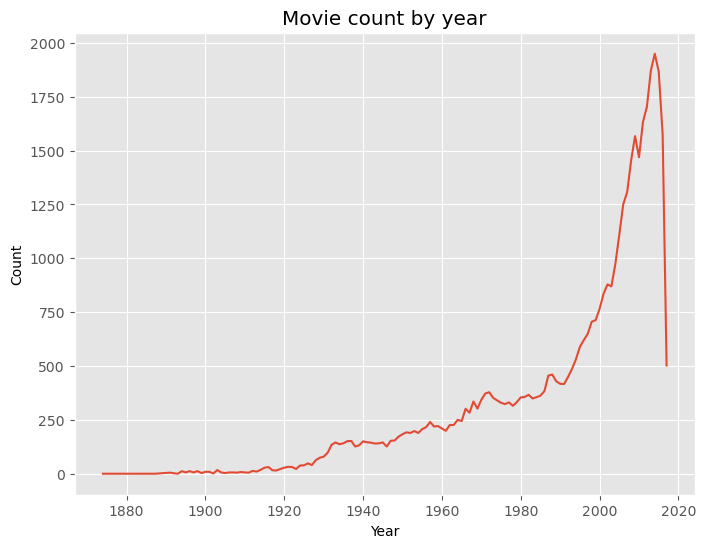

In [331]:
plt.figure(figsize=(8,6))
df['year'].value_counts().sort_index().plot()
plt.title('Movie count by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Genres analysis

In [393]:
genres = df.genres.str.split('|').explode().to_frame()

In [394]:
genres = genres.merge(df[['title','popularity','budget_musd','revenue_musd','roi', 'year']], 
                      left_index=True, 
                      right_index=True).reset_index()

In [351]:
# creating aggregations of genres
agg_genres = genres.groupby('genres').agg(total_count=('title', 'count'),
                                          mean_pop=('popularity','mean'),
                                          mean_budget=('budget_musd', 'mean'),
                                          mean_revenue=('revenue_musd', 'mean'),
                                          median_roi=('roi', 'median'))

In [352]:
agg_genres

,total_count,mean_pop,mean_budget,mean_revenue,median_roi
genres,,,,,
Action,6542,4.783477,36.766719,116.073804,2.013075
Adventure,3468,6.003722,51.093255,179.192356,2.293118
Animation,1911,4.747663,46.738843,176.989426,2.766942
Comedy,13067,3.248691,21.601565,64.097213,2.106664
Crime,4282,4.154379,21.958441,58.518680,1.879455
Documentary,3867,0.956166,1.894464,6.647303,2.663251
Drama,20054,3.029791,16.878877,43.826162,1.750130
Family,2740,4.765833,46.620167,159.103683,2.483950
Fantasy,2290,5.361045,46.991335,166.006633,2.123353


#### Number of movies by genres over time

In [410]:
agg_year = genres.groupby(['year', 'genres']).agg(total_count=('title', 'count'),
                                   mean_pop=('popularity','mean'),
                                   mean_budget=('budget_musd', 'mean'),
                                   mean_revenue=('revenue_musd', 'mean'),
                                   median_roi=('roi', 'median')).reset_index()

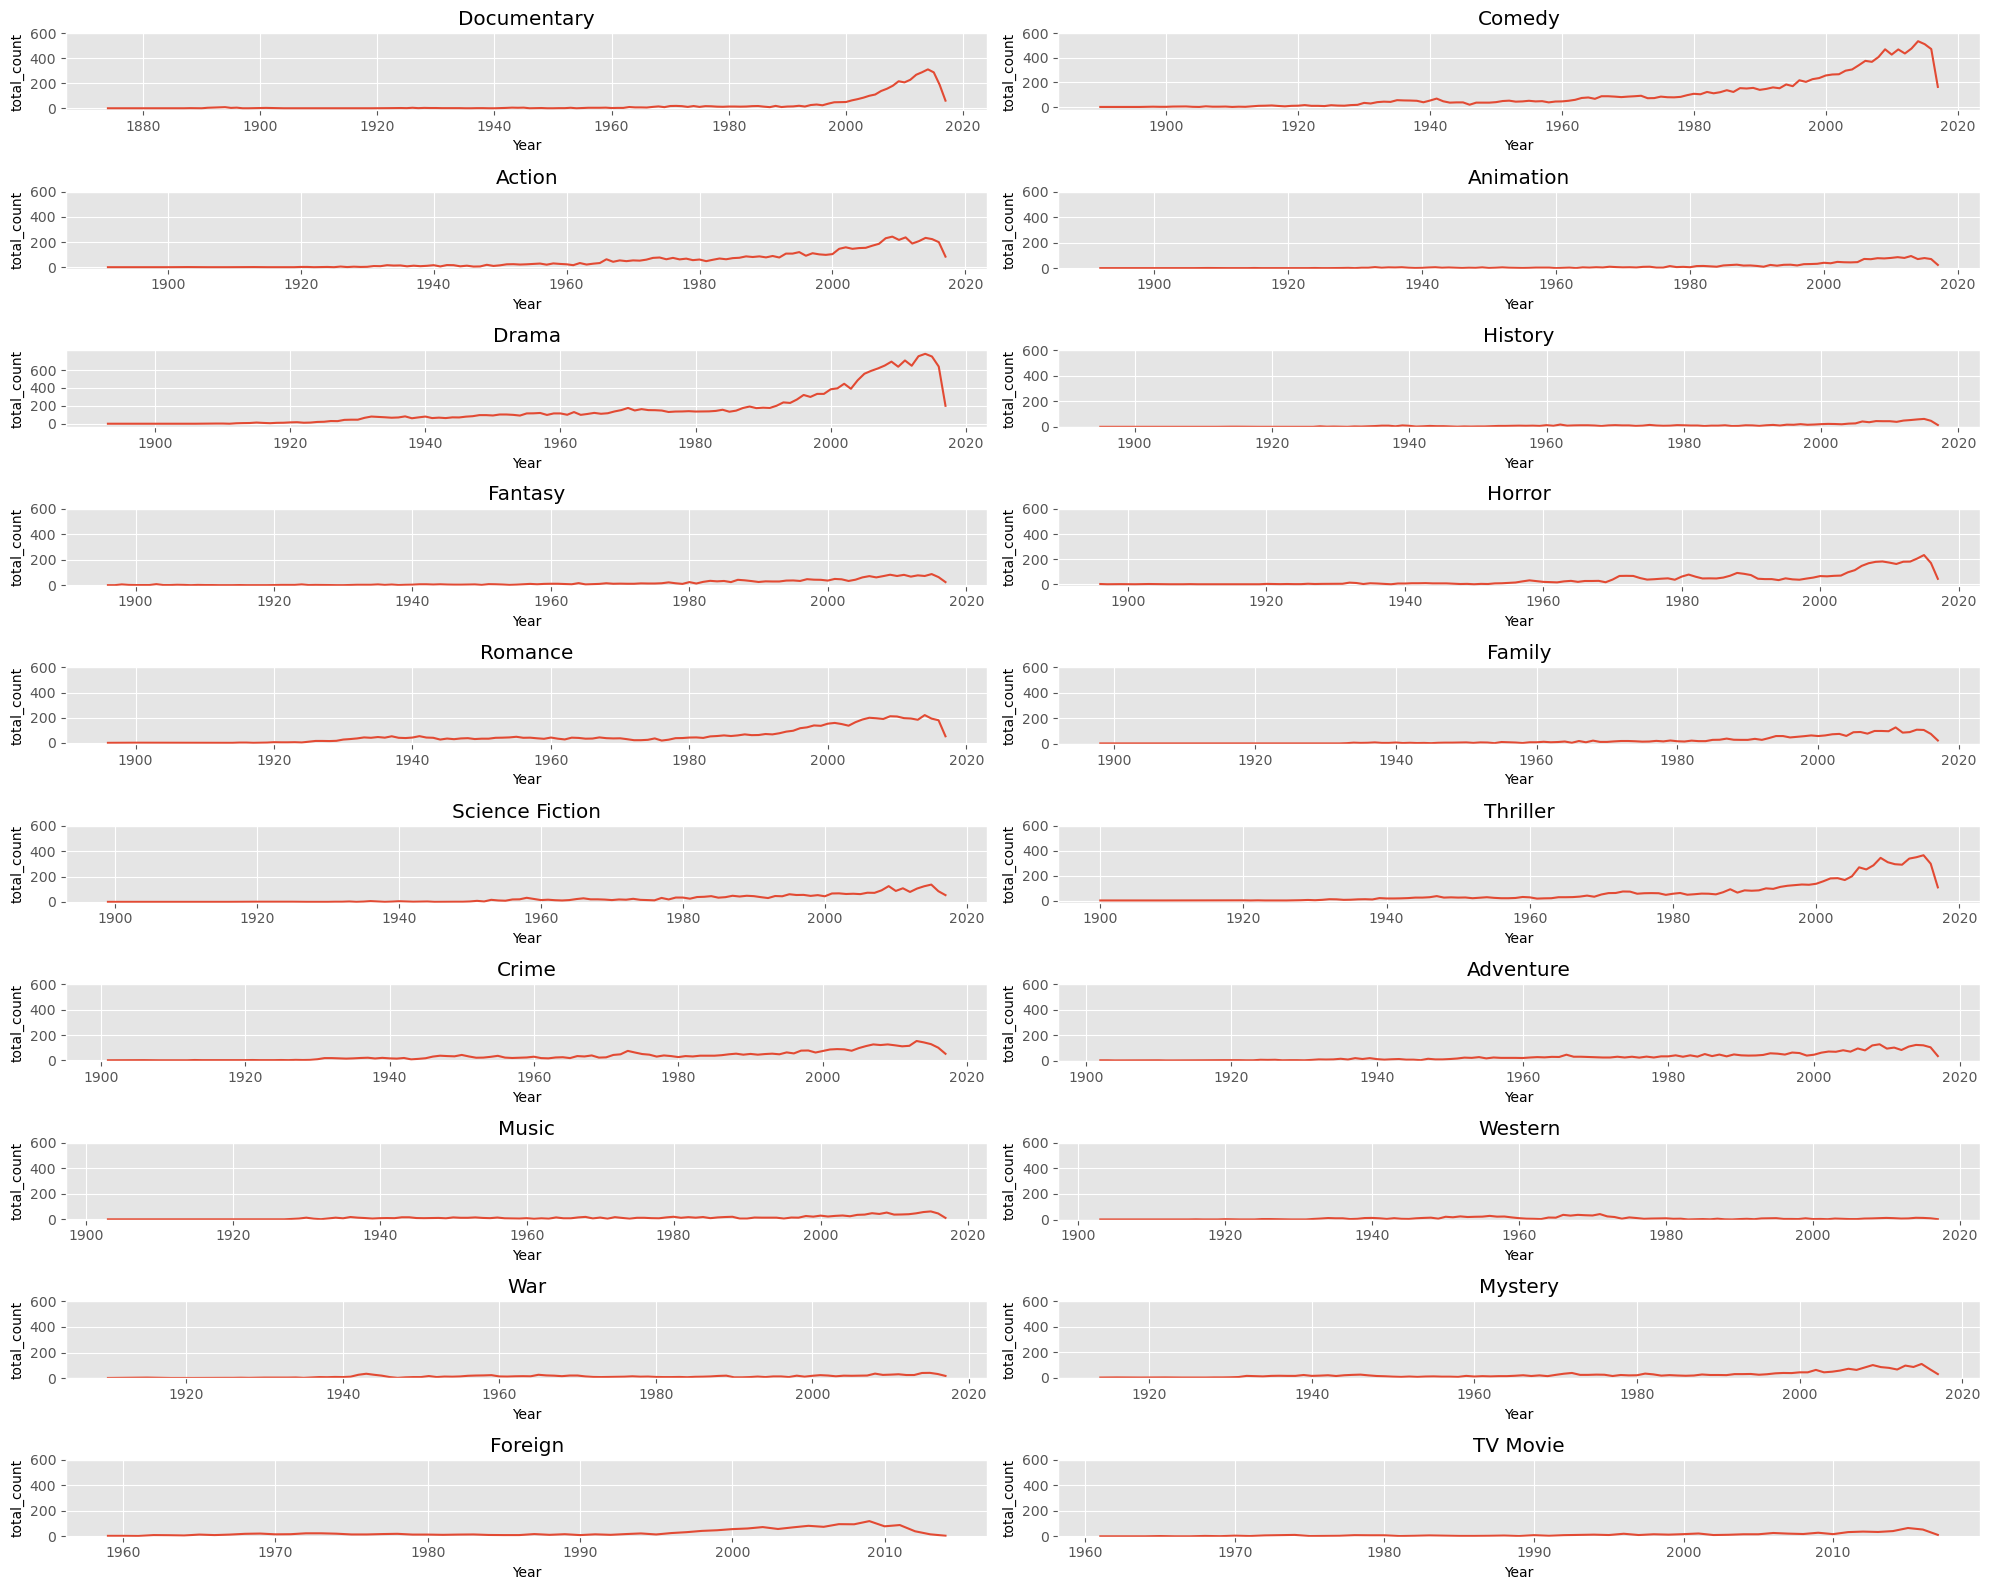

In [480]:
unq_genres = agg_year['genres'].unique()
plt.figure(figsize=(20,16))

for n, genre in enumerate(unq_genres):
    ax = plt.subplot(10,2, n+1)
    sns.lineplot(data=agg_year[agg_year['genres']==genre], x='year', y='total_count')
    plt.yticks([0, 200, 400, 600])
    plt.title(genre)
    plt.xlabel('Year')
#     plt.ylabel('Count')
    plt.tight_layout()
plt.show()

In [1]:
px.line(data_frame=agg_year, x='year', y='total_count', color='genres')

NameError: name 'px' is not defined

#### Popularity of movies over time

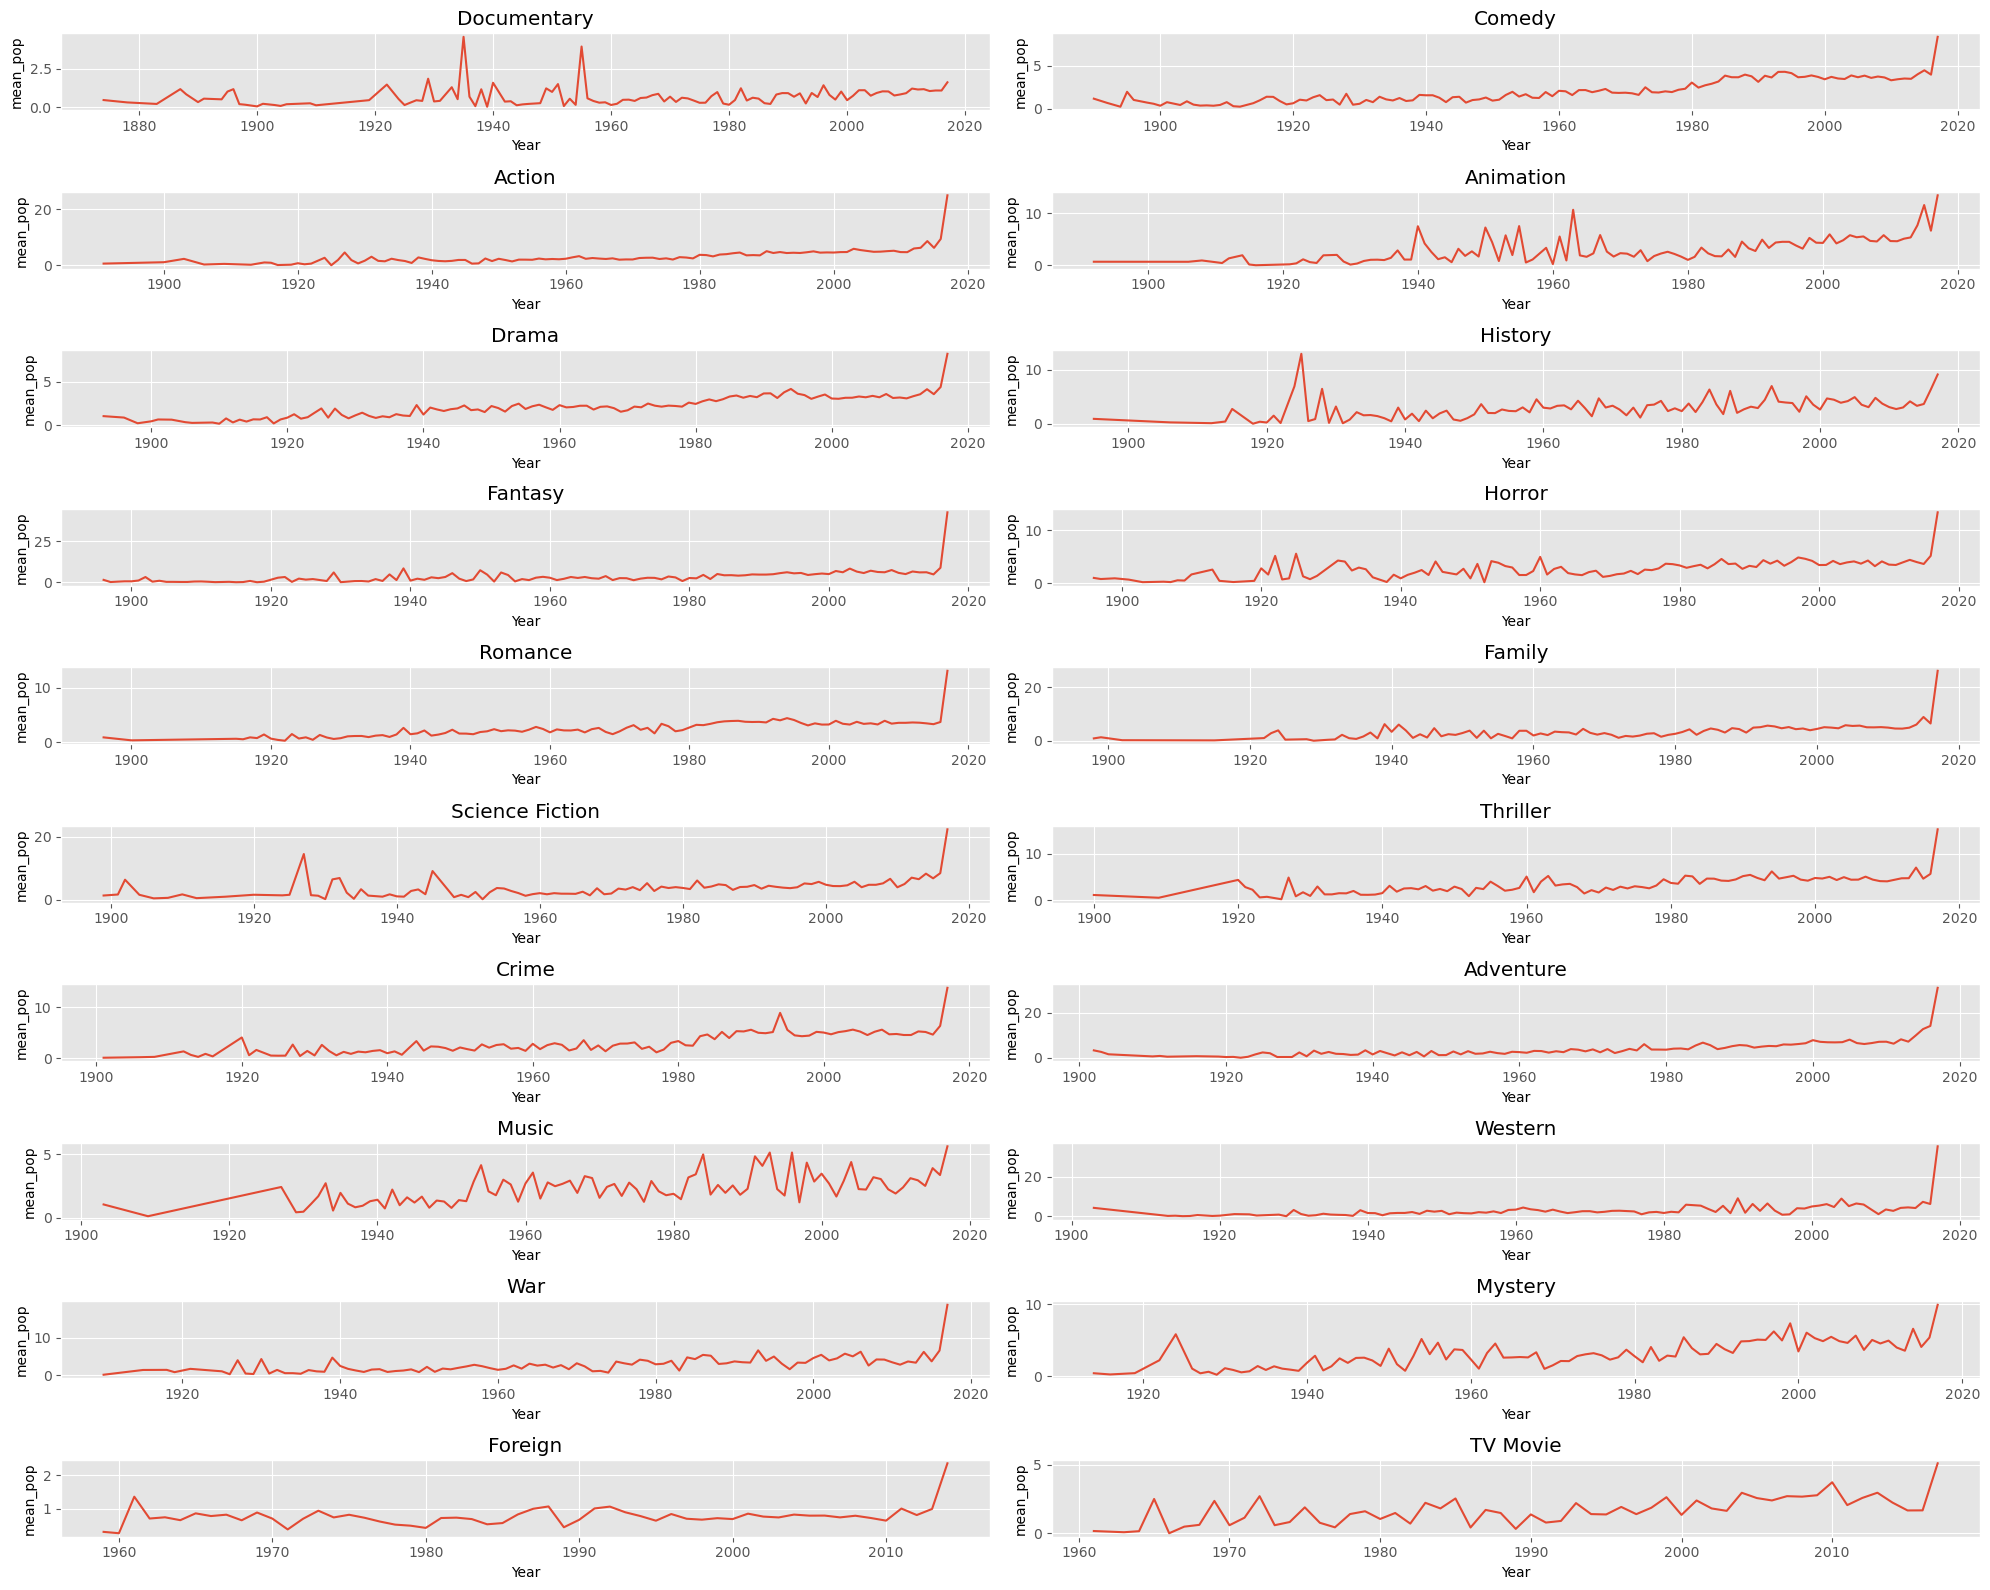

In [483]:
unq_genres = agg_year['genres'].unique()
plt.figure(figsize=(20,16))

for n, genre in enumerate(unq_genres):
    ax = plt.subplot(10,2, n+1)
    sns.lineplot(data=agg_year[agg_year['genres']==genre], x='year', y='mean_pop')
#     plt.yticks([0, 200, 400, 600])
    plt.title(genre)
    plt.xlabel('Year')
#     plt.ylabel('Count')
    plt.tight_layout()
plt.show()